# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [906]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [907]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install --upgrade matplotlib==3.10.0
import matplotlib
print(matplotlib.__version__)
import datetime as dt

3.10.0


In [908]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [911]:
# Try loading one file
df = pd.read_parquet(r'C:\Users\Lenovo\Desktop\PGP_notes\Data toolkit\Assignment\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

(3041714, 19)

In [912]:
df.head(15)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1          2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2          2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3          1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4          2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
5          2  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0   
6          2  2023-01-01 00:09:22   2023-01-01 00:19:49              1.0   
7          2  2023-01-01 00:27:12   2023-01-01 00:49:56              1.0   
8          2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
9          2  2023-01-01 00:39:42   2023-01-01 00:50:36              1.0   
10         2  2023-01-01 00:53:01   2023-01-01 01:01:45              1.0   
11         1  2023-01-01 00:43:37   2023-01-01 01:17:18              4.0   
12         2  2023-01-01 00:34:44   2023-01-01 01:04:25              1.0   
13         2  2023-01-01 00:09:29   2023-01-01 00:29:23              2.0   
14         2  2023-01-01 00:33:53   2023-01-01 00:49:15              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.97         1.0                  N           161           141   
1            1.10         1.0                  N            43           237   
2            2.51         1.0                  N            48           238   
3            1.90         1.0                  N           138             7   
4            1.43         1.0                  N           107            79   
5            1.84         1.0                  N           161           137   
6            1.66         1.0                  N           239           143   
7           11.70         1.0                  N           142           200   
8            2.95         1.0                  N           164           236   
9            3.01         1.0                  N           141           107   
10           1.80         1.0                  N           234            68   
11           7.30         1.0                  N            79           264   
12           3.23         1.0                  N           164           143   
13          11.43         1.0                  N           138            33   
14           2.95         1.0                  N            33            61   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              2          9.3   1.00      0.5        0.00           0.0   
1              1          7.9   1.00      0.5        4.00           0.0   
2              1         14.9   1.00      0.5       15.00           0.0   
3              1         12.1   7.25      0.5        0.00           0.0   
4              1         11.4   1.00      0.5        3.28           0.0   
5              1         12.8   1.00      0.5       10.00           0.0   
6              1         12.1   1.00      0.5        3.42           0.0   
7              1         45.7   1.00      0.5       10.74           3.0   
8              1         17.7   1.00      0.5        5.68           0.0   
9              2         14.9   1.00      0.5        0.00           0.0   
10             1         11.4   1.00      0.5        3.28           0.0   
11             1         33.8   3.50      0.5        7.75           0.0   
12             1         26.1   1.00      0.5        6.22           0.0   
13             1         44.3   6.00      0.5       13.26           0.0   
14             1         17.7   1.00      0.5        4.04           0.0   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                     1.0         14.30                   2.5         0.00  
1                     1.0         16.90                   2.5         0.00  
2                     1.0         34.90                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [918]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [919]:
# from google.colab import drive
# drive.mount('/content/drive')

In [920]:
import os
import pandas as pd

# Set the working directory containing data files
os.chdir(r"C:\Users\Lenovo\Desktop\PGP_notes\Data toolkit\Assignment\Datasets and Dictionary\trip_records")

# Get a list of all files in the directory (assuming CSV format)
file_list = os.listdir()

# Initialize an empty dataframe to store the final sampled data
final_df = pd.DataFrame()

print(file_list)

['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', 'sampled_trip_records.csv']


In [921]:
import os
import pandas as pd

# Set the working directory containing data files
os.chdir(r"C:\Users\Lenovo\Desktop\PGP_notes\Data toolkit\Assignment\Datasets and Dictionary\trip_records")

# Get a list of all files in the directory (assuming CSV format)
file_list = file_list = os.listdir()

# Initialize an empty dataframe to store the final sampled data
final_df = pd.DataFrame()

# Iterate through each monthly data file
for file_name in file_list:
    try:
        # Construct the full file path
        file_path = os.path.join(os.getcwd(), file_name)

        # Read the CSV file into a dataframe
        df = pd.read_parquet(file_path)  # Modify column name if needed
        
        # Extract the date and hour from timestamp
        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # Temporary dataframe to store sampled data for the current file
        sampled_data = pd.DataFrame()

        # Iterate through each unique date
        for date in df['date'].unique():
            daily_data = df[df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):  # Loop from 0 to 23 hours
                hourly_data = daily_data[daily_data['hour'] == hour]

                # Sample 5% of the hourly data (if available)
                if not hourly_data.empty:
                    sampled_hourly_data = hourly_data.sample(frac=0.0075, random_state=42)
                    sampled_data = pd.concat([sampled_data, sampled_hourly_data])

        # Append sampled data of the current month to the final dataframe
        final_df = pd.concat([final_df, sampled_data])

        print(f"Processed {file_name} successfully.")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Save the final sampled dataset as a new CSV file
final_df.to_csv("sampled_trip_records.csv", index=False)

print("Sampling completed and data saved!")

Processed 2023-1.parquet successfully.
Processed 2023-10.parquet successfully.
Processed 2023-11.parquet successfully.
Processed 2023-12.parquet successfully.
Processed 2023-2.parquet successfully.
Processed 2023-3.parquet successfully.
Processed 2023-4.parquet successfully.
Processed 2023-5.parquet successfully.
Processed 2023-6.parquet successfully.
Processed 2023-7.parquet successfully.
Processed 2023-8.parquet successfully.
Processed 2023-9.parquet successfully.
Error reading file sampled_trip_records.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Sampling completed and data saved!


In [922]:
final_df.shape

(284492, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [924]:
# Store the df in csv/parquet
# df.to_parquet('')
check = pd.read_csv(r"C:\Users\Lenovo\Desktop\PGP_notes\Data toolkit\Assignment\Datasets and Dictionary\trip_records\sampled_trip_records.csv")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [927]:
# Load the new data file
dc = pd.read_csv(r"C:\Users\Lenovo\Desktop\PGP_notes\Data toolkit\Assignment\Datasets and Dictionary\trip_records\sampled_trip_records.csv")

In [928]:
# df.head()
dc.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [929]:
# df.info()
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   tpep_pickup_datetime   284492 non-null  object 
 2   tpep_dropoff_datetime  284492 non-null  object 
 3   passenger_count        275065 non-null  float64
 4   trip_distance          284492 non-null  float64
 5   RatecodeID             275065 non-null  float64
 6   store_and_fwd_flag     275065 non-null  object 
 7   PULocationID           284492 non-null  int64  
 8   DOLocationID           284492 non-null  int64  
 9   payment_type           284492 non-null  int64  
 10  fare_amount            284492 non-null  float64
 11  extra                  284492 non-null  float64
 12  mta_tax                284492 non-null  float64
 13  tip_amount             284492 non-null  float64
 14  tolls_amount           284492 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [932]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   tpep_pickup_datetime   284492 non-null  object 
 2   tpep_dropoff_datetime  284492 non-null  object 
 3   passenger_count        275065 non-null  float64
 4   trip_distance          284492 non-null  float64
 5   RatecodeID             275065 non-null  float64
 6   store_and_fwd_flag     275065 non-null  object 
 7   PULocationID           284492 non-null  int64  
 8   DOLocationID           284492 non-null  int64  
 9   payment_type           284492 non-null  int64  
 10  fare_amount            284492 non-null  float64
 11  extra                  284492 non-null  float64
 12  mta_tax                284492 non-null  float64
 13  tip_amount             284492 non-null  float64
 14  tolls_amount           284492 non-nu

In [933]:
dc.columns = dc.columns.str.replace(r"\W", "", regex=True)
print(list(dc.columns))

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour', 'Airport_fee']


In [934]:
# Fix the index and drop any columns that are not needed
dc.drop(columns=['store_and_fwd_flag'], inplace=True)

In [935]:
print(list(dc.columns))

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour', 'Airport_fee']


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [937]:
dc.airport_fee.isnull().sum()

262204

In [938]:
dc.Airport_fee.isnull().sum()

31715

In [939]:
# Combine the two airport fee columns
dc['Airport_fee'] = dc[['airport_fee', 'Airport_fee']].sum(axis=1)
dc.drop(columns=['airport_fee'], inplace=True)

In [940]:
dc.Airport_fee.isnull().sum()

0

In [941]:
dc.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00           0.0   
1         7.90    1.0      0.5        2.58           0.0   
2        11.40    1.0      0.5        0.00           0.0   
3         6.50    1.0      0.5        0.00           0.0   
4        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge        date  \
0                    1.0         41.15                   0.0  2023-01-01   
1                    1.0         15.48                   2.5  2023-01-01   
2                    1.0         16.40                   2.5  2023-01-01   
3                    1.0         11.50                   2.5  2023-01-01   
4                    1.0         35.57                   NaN  2023-01-01   

   hour  Airport_fee  
0     0         1.25  
1     0         0.00  
2     0         0.00  
3     0         0.00  
4     0         0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [943]:
# check where values of fare amount are negative
dc.fare_amount.lt(0).sum()

0

Did you notice something different in the `RatecodeID` column for above records?

In [945]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_df = dc[dc["fare_amount"] < 0]
negative_fare_df["RatecodeID"].value_counts()
negative_fare_df.groupby("RatecodeID")["fare_amount"].describe()

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

In [946]:
# Find which columns have negative values
negative_columns = dc.select_dtypes(include=['number']).lt(0).sum()
negative_columns[negative_columns>0]

extra                     1
mta_tax                  11
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
Airport_fee               2
dtype: int64

In [947]:
# fix these negative values
dc[negative_columns.index] = dc[negative_columns.index].abs()

In [948]:
negative_columns = dc.select_dtypes(include=['number']).lt(0).sum()
negative_columns[negative_columns>0]

Series([], dtype: int64)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [951]:
# Find the proportion of missing values in each column
dc.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          9427
trip_distance               0
RatecodeID               9427
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     9427
date                        0
hour                        0
Airport_fee                 0
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [953]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
dc[dc.isnull().any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
43             2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
44             2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
59             2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
...          ...                  ...                   ...              ...   
284343         1  2023-09-30 21:50:20   2023-09-30 22:06:38              NaN   
284405         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
284447         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
284466         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
284483         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4               19.24         NaN            66           107             0   
15              10.77         NaN           151           106             0   
43               4.97         NaN            50           226             0   
44               5.73         NaN           186           255             0   
59               2.98         NaN           137            48             0   
...               ...         ...           ...           ...           ...   
284343           0.00         NaN           249            87             0   
284405           0.00         NaN            48           249             0   
284447           3.01         NaN           163           262             0   
284466           0.00         NaN           161            87             0   
284483           0.00         NaN           249           231             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4             25.64    0.0      0.5        5.93          0.00   
15            45.38    0.0      0.5       11.19          6.55   
43            27.62    0.0      0.5        6.32          0.00   
44            27.32    0.0      0.5        6.26          0.00   
59            27.54    0.0      0.5        3.15          0.00   
...             ...    ...      ...         ...           ...   
284343        19.71    0.0      0.5        0.00          0.00   
284405        21.88    0.0      0.5        0.00          0.00   
284447        22.25    0.0      0.5        5.25          0.00   
284466        31.01    0.0      0.5        0.00          0.00   
284483        20.65    0.0      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
4                         1.0         35.57                   NaN  2023-01-01   
15                        1.0         67.12                   NaN  2023-01-01   
43                        1.0         37.94                   NaN  2023-01-01   
44                        1.0         37.58                   NaN  2023-01-01   
59                        1.0         34.69                   NaN  2023-01-01   
...                       ...           ...                   ...         ...   
284343                    1.0         23.71                   NaN  2023-09-30   
284405                    1.0         25.88                   NaN  2023-09-30   
284447                    1.0         31.50                   NaN  2023-09-30   
284466                    1.0         35.01                   NaN  2023-09-30   
284483                    1.0         24.65                   NaN  2023-09-30   

        hour  Airport_fee  
4          0          0.0  
15         0          0.0  
43         1          0.0  
44         1          0.0  
59         1          0.0  
...      ...          ...  
284343    21          0.0  
284405    22          0.0  
284447    23          0.0  
284466    23          0.0  
284483    23          0.0  

[9427 r

In [954]:
# Impute NaN values in 'passenger_count'
dc.passenger_count.describe()

count    275065.000000
mean          1.367568
std           0.890947
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: passenger_count, dtype: float64

In [955]:
dc['passenger_count'].fillna(dc['passenger_count'].mode()[0], inplace=True)

In [956]:
dc.passenger_count.isnull().sum()

0

In [957]:
#handling zeros in dc.passenger_count

In [958]:
dc[dc.isnull().any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
43             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
44             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
59             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
284343         1  2023-09-30 21:50:20   2023-09-30 22:06:38              1.0   
284405         1  2023-09-30 22:53:15   2023-09-30 23:10:04              1.0   
284447         2  2023-09-30 23:27:39   2023-09-30 23:43:22              1.0   
284466         1  2023-09-30 23:12:36   2023-09-30 23:36:35              1.0   
284483         1  2023-09-30 23:31:35   2023-09-30 23:41:26              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4               19.24         NaN            66           107             0   
15              10.77         NaN           151           106             0   
43               4.97         NaN            50           226             0   
44               5.73         NaN           186           255             0   
59               2.98         NaN           137            48             0   
...               ...         ...           ...           ...           ...   
284343           0.00         NaN           249            87             0   
284405           0.00         NaN            48           249             0   
284447           3.01         NaN           163           262             0   
284466           0.00         NaN           161            87             0   
284483           0.00         NaN           249           231             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4             25.64    0.0      0.5        5.93          0.00   
15            45.38    0.0      0.5       11.19          6.55   
43            27.62    0.0      0.5        6.32          0.00   
44            27.32    0.0      0.5        6.26          0.00   
59            27.54    0.0      0.5        3.15          0.00   
...             ...    ...      ...         ...           ...   
284343        19.71    0.0      0.5        0.00          0.00   
284405        21.88    0.0      0.5        0.00          0.00   
284447        22.25    0.0      0.5        5.25          0.00   
284466        31.01    0.0      0.5        0.00          0.00   
284483        20.65    0.0      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
4                         1.0         35.57                   NaN  2023-01-01   
15                        1.0         67.12                   NaN  2023-01-01   
43                        1.0         37.94                   NaN  2023-01-01   
44                        1.0         37.58                   NaN  2023-01-01   
59                        1.0         34.69                   NaN  2023-01-01   
...                       ...           ...                   ...         ...   
284343                    1.0         23.71                   NaN  2023-09-30   
284405                    1.0         25.88                   NaN  2023-09-30   
284447                    1.0         31.50                   NaN  2023-09-30   
284466                    1.0         35.01                   NaN  2023-09-30   
284483                    1.0         24.65                   NaN  2023-09-30   

        hour  Airport_fee  
4          0          0.0  
15         0          0.0  
43         1          0.0  
44         1          0.0  
59         1          0.0  
...      ...          ...  
284343    21          0.0  
284405    22          0.0  
284447    23          0.0  
284466    23          0.0  
284483    23          0.0  

[9427 r

Did you find zeroes in passenger_count? Handle these.

In [960]:
dc[dc['passenger_count'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
74             1  2023-01-01 01:25:41   2023-01-01 01:25:45              0.0   
115            1  2023-01-01 02:20:58   2023-01-01 02:31:32              0.0   
131            1  2023-01-01 03:11:25   2023-01-01 03:20:21              0.0   
204            1  2023-01-01 09:31:46   2023-01-01 09:42:22              0.0   
223            1  2023-01-01 10:02:01   2023-01-01 10:18:31              0.0   
...          ...                  ...                   ...              ...   
284232         1  2023-09-30 18:10:41   2023-09-30 18:26:47              0.0   
284250         1  2023-09-30 19:07:02   2023-09-30 19:13:38              0.0   
284305         1  2023-09-30 20:12:49   2023-09-30 20:20:22              0.0   
284336         1  2023-09-30 20:57:05   2023-09-30 21:31:44              0.0   
284470         1  2023-09-30 23:04:02   2023-09-30 23:05:11              0.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
74                0.0         1.0           148           148             1   
115               1.5         1.0           158           264             1   
131               1.8         1.0           141           239             1   
204               1.9         1.0            43            74             1   
223               4.0         1.0           164            13             2   
...               ...         ...           ...           ...           ...   
284232            2.6         1.0           246           142             2   
284250            1.4         1.0           239           142             1   
284305            1.3         1.0           163           236             1   
284336            3.7         1.0           107           256             1   
284470            0.2         1.0            50            50             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
74              3.0    3.5      0.5       52.00           0.0   
115            12.1    3.5      0.5        2.00           0.0   
131            10.7    3.5      0.5        1.00           0.0   
204            11.4    0.0      0.5        2.55           0.0   
223            20.5    2.5      0.5        0.00           0.0   
...             ...    ...      ...         ...           ...   
284232         17.0    2.5      0.5        0.00           0.0   
284250          9.3    2.5      0.5        2.65           0.0   
284305          9.3    3.5      0.5        1.70           0.0   
284336         26.1    3.5      0.5        0.00           0.0   
284470          3.7    3.5      0.5        1.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
74                        1.0         60.00                   2.5  2023-01-01   
115                       1.0         19.10                   2.5  2023-01-01   
131                       1.0         16.70                   2.5  2023-01-01   
204                       1.0         15.45                   0.0  2023-01-01   
223                       1.0         24.50                   2.5  2023-01-01   
...                       ...           ...                   ...         ...   
284232                    1.0         21.00                   2.5  2023-09-30   
284250                    1.0         15.95                   2.5  2023-09-30   
284305                    1.0         16.00                   2.5  2023-09-30   
284336                    1.0         31.10                   2.5  2023-09-30   
284470                    1.0          9.70                   2.5  2023-09-30   

        hour  Airport_fee  
74         1          0.0  
115        2          0.0  
131        3          0.0  
204        9          0.0  
223       10          0.0  
...      ...          ...  
284232    18          0.0  
284250    19          0.0  
284305    20          0.0  
284336    20          0.0  
284470    23          0.0  

[4375 r

In [961]:
dc['passenger_count'] = dc['passenger_count'].replace(0, 1)
dc[dc['passenger_count'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [963]:
# Fix missing values in 'RatecodeID'
dc.RatecodeID.isnull().sum()/dc.shape[0]*100

3.3136256907048356

In [964]:
dc.RatecodeID.describe()

count    275065.000000
mean          1.656019
std           7.533037
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64

In [965]:
dc['RatecodeID'].fillna(dc['RatecodeID'].mode()[0], inplace=True)

In [966]:
dc.RatecodeID.isnull().sum()/dc.shape[0]*100

0.0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [968]:
# handle null values in congestion_surcharge
## Assuming if the congestion_surgade is not levied, those values are filled as Nan, so filling with zeros
dc["congestion_surcharge"] = dc["congestion_surcharge"].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [970]:
# Handle any remaining missing values
dc.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [973]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
dc.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  284492.000000    284492.000000  284492.000000  284492.000000   
mean        1.733349         1.370766       3.569540       1.634281   
std         0.447582         0.863288      46.959114       7.408107   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  284492.000000  284492.000000  284492.000000  284492.000000   
mean      165.252106     163.953180       1.165094      19.817924   
std        64.049104      69.773988       0.506215      18.203902   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     910.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  284492.000000  284492.000000  284492.000000  284492.000000   
mean        1.587177       0.495370       3.544263       0.592555   
std         1.823731       0.047965       4.051388       2.175295   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000     143.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          284492.000000  284492.000000         284492.000000   
mean                0.999076      28.873393              2.231970   
std                 0.027923      22.759733              0.773458   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     911.000000              2.500000   

                hour    Airport_fee  
count  284492.000000  284492.000000  
mean       14.264675       0.137728  
std         5.807753       0.456828  
min         0.000000       0.000000  
25%        11.000000       0.000000  
50%        15.000000       0.000000  
75%        19.000000       0.000000  
max        23.000000       1.750000

In [974]:
 # Shows columns with potential outliers
dc1 = dc.select_dtypes(include=['number'])

Q1 = dc1.quantile(0.25)
Q3 = dc1.quantile(0.75)
IQR = Q3 - Q1

outliers = ((dc1 < (Q1 - 1.5 * IQR)) | (dc1 > (Q3 + 1.5 * IQR))).sum()
print(outliers[outliers > 0]) 

VendorID                    68
passenger_count          63434
trip_distance            37135
RatecodeID               15424
payment_type             60445
fare_amount              29346
extra                     4955
mta_tax                   2649
tip_amount               21719
tolls_amount             22979
improvement_surcharge      321
total_amount             32694
congestion_surcharge     30501
Airport_fee              24128
dtype: int64


In [1053]:
# Selecting numerical columns for outlier detection
dc['improvement_surcharge'].value_counts()

improvement_surcharge
1.0    247099
0.3       134
0.0       121
Name: count, dtype: int64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [979]:
# remove passenger_count > 6
dc = dc[dc["passenger_count"]<=6]

In [980]:
dc['passenger_count'].value_counts()

passenger_count
1.0    221058
2.0     41394
3.0     10386
4.0      5709
5.0      3547
6.0      2393
Name: count, dtype: int64

In [981]:
# Continue with outlier handling
dc["trip_distance"].describe()

count    284487.000000
mean          3.569432
std          46.959489
min           0.000000
25%           1.050000
50%           1.800000
75%           3.400000
max       22528.820000
Name: trip_distance, dtype: float64

<Axes: xlabel='trip_distance'>

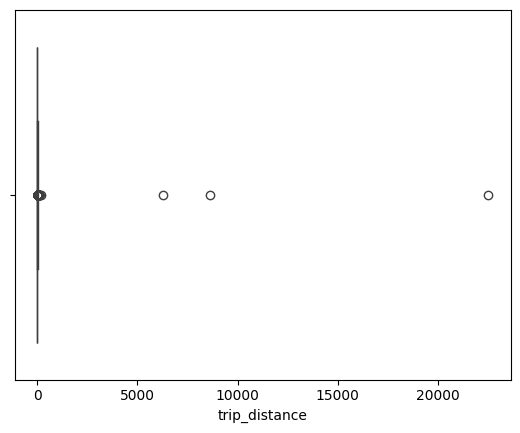

In [982]:
sns.boxplot(x=dc["trip_distance"])

In [991]:
Q1  = dc['trip_distance'].quantile(0.25)
Q3 = dc['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dc = dc[(dc['trip_distance'] >= lower_bound) & (dc['trip_distance'] <= upper_bound)]

<Axes: xlabel='trip_distance'>

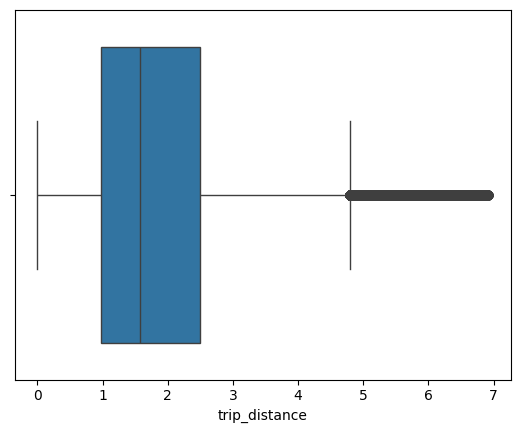

In [992]:
sns.boxplot(x=dc["trip_distance"])

In [1037]:
dc[dc['trip_distance'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
55             2  2023-01-01 01:34:06   2023-01-01 01:34:14              2.0   
74             1  2023-01-01 01:25:41   2023-01-01 01:25:45              1.0   
80             1  2023-01-01 01:26:38   2023-01-01 01:27:12              1.0   
81             2  2023-01-01 01:20:00   2023-01-01 01:20:02              4.0   
125            2  2023-01-01 03:18:36   2023-01-01 03:18:42              1.0   
...          ...                  ...                   ...              ...   
284405         1  2023-09-30 22:53:15   2023-09-30 23:10:04              1.0   
284424         1  2023-09-30 22:25:15   2023-09-30 22:25:19              1.0   
284451         2  2023-09-30 23:34:29   2023-09-30 23:49:06              1.0   
284466         1  2023-09-30 23:12:36   2023-09-30 23:36:35              1.0   
284483         1  2023-09-30 23:31:35   2023-09-30 23:41:26              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
55                0.0         5.0           265           265             1   
74                0.0         1.0           148           148             1   
80                0.0         5.0           229           229             1   
81                0.0         5.0           264           264             1   
125               0.0         1.0           113           113             2   
...               ...         ...           ...           ...           ...   
284405            0.0         1.0            48           249             0   
284424            0.0         1.0           152           152             1   
284451            0.0         1.0           264           264             1   
284466            0.0         1.0           161            87             0   
284483            0.0         1.0           249           231             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
55            50.00    0.0      0.0       10.20           0.0   
74             3.00    3.5      0.5       52.00           0.0   
80             5.00    0.0      0.0        0.00           0.0   
81            45.00    0.0      0.0        0.80           0.0   
125            3.00    1.0      0.5        0.00           0.0   
...             ...    ...      ...         ...           ...   
284405        21.88    0.0      0.5        0.00           0.0   
284424        34.50    0.0      0.5        0.00           0.0   
284451        12.80    1.0      0.5        4.59           0.0   
284466        31.01    0.0      0.5        0.00           0.0   
284483        20.65    0.0      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
55                        1.0         61.20                   0.0  2023-01-01   
74                        1.0         60.00                   2.5  2023-01-01   
80                        1.0          6.00                   0.0  2023-01-01   
81                        1.0         46.80                   0.0  2023-01-01   
125                       1.0          8.00                   2.5  2023-01-01   
...                       ...           ...                   ...         ...   
284405                    1.0         25.88                   0.0  2023-09-30   
284424                    1.0         36.00                   0.0  2023-09-30   
284451                    1.0         19.89                   0.0  2023-09-30   
284466                    1.0         35.01                   0.0  2023-09-30   
284483                    1.0         24.65                   0.0  2023-09-30   

        hour  Airport_fee  
55         1          0.0  
74         1          0.0  
80         1          0.0  
81         1          0.0  
125        3          0.0  
...      ...          ...  
284405    22          0.0  
284424    22          0.0  
284451    23          0.0  
284466    23          0.0  
284483    23          0.0  

[5620 r

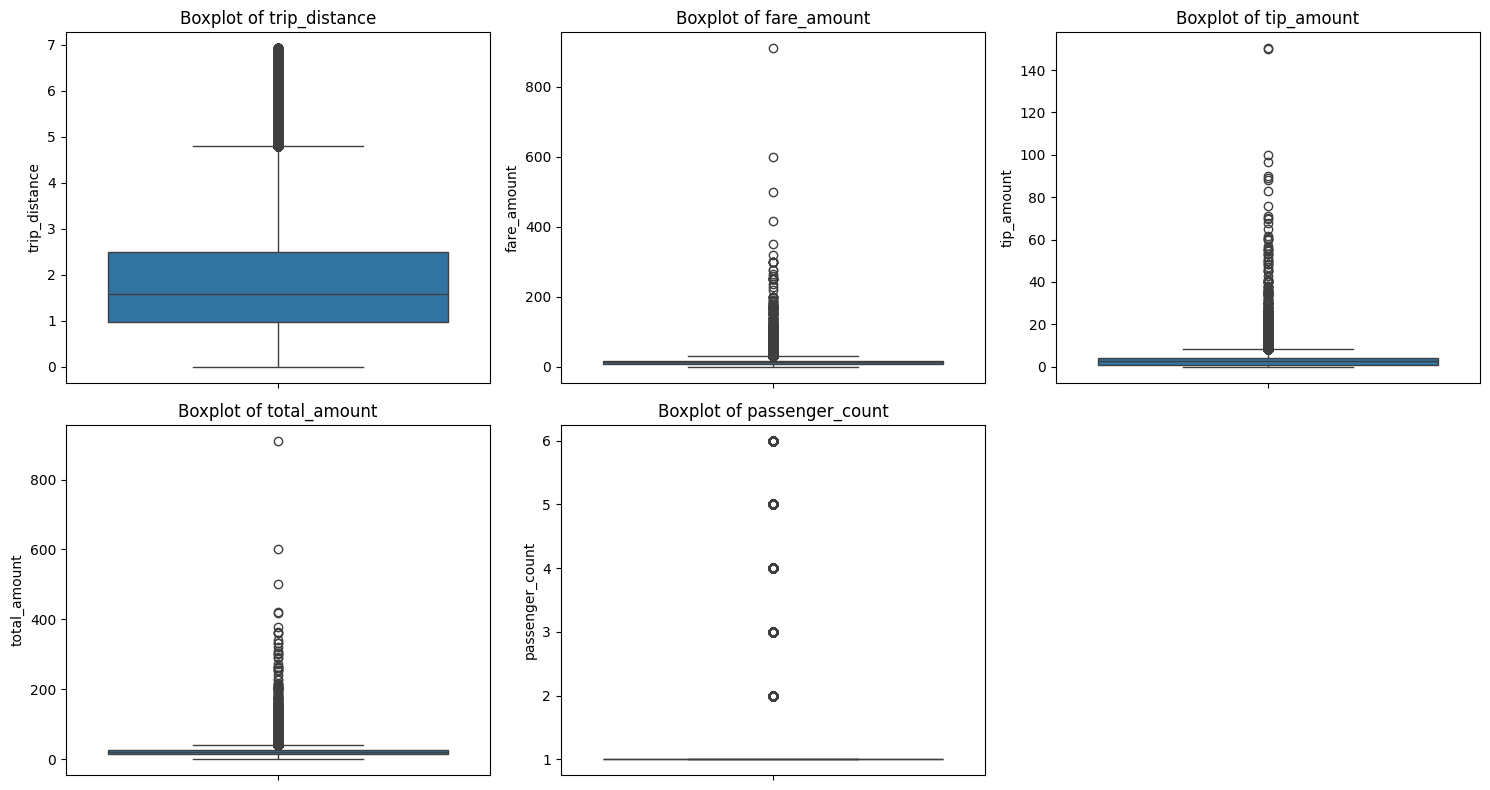

In [1055]:
numeric_cols = ["trip_distance", "fare_amount", "tip_amount", "total_amount", "passenger_count"]

# Plotting boxplots for outlier detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=dc[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [1089]:
dc["tip_amount"].describe()

count    247354.000000
mean          2.719399
std           2.435840
min           0.000000
25%           1.000000
50%           2.660000
75%           3.920000
max         150.290000
Name: tip_amount, dtype: float64

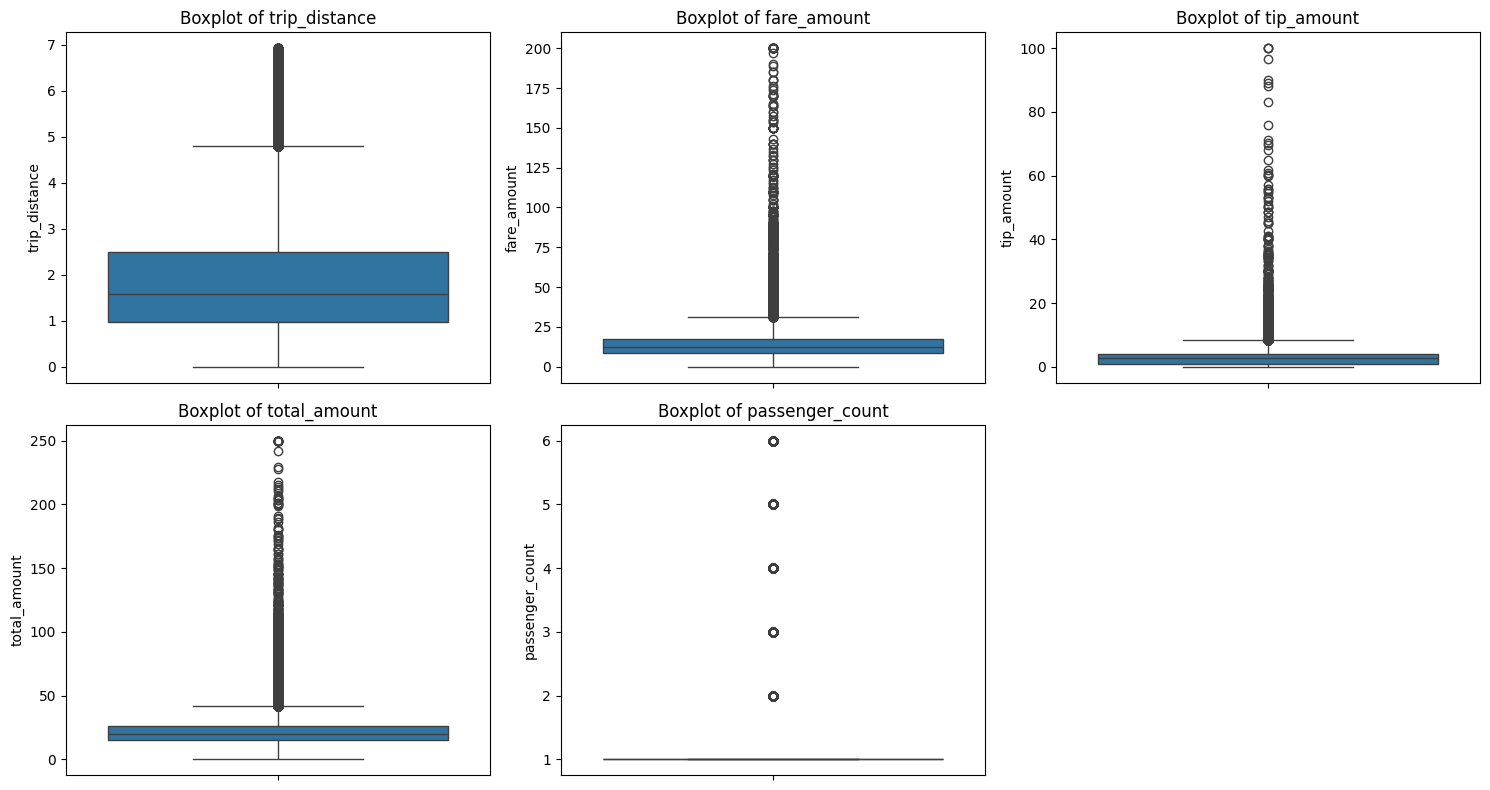

In [1122]:
dc["fare_amount"] = dc["fare_amount"].clip(upper=200)  # Set max fare amount to $300
dc["total_amount"] = dc["total_amount"].clip(upper=250)
dc["tip_amount"] = dc["tip_amount"].clip(upper=100)


plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=dc[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [1124]:
# Do any columns need standardising?
dc.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
date                      object
hour                       int64
Airport_fee              float64
dtype: object

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [1126]:
dc.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

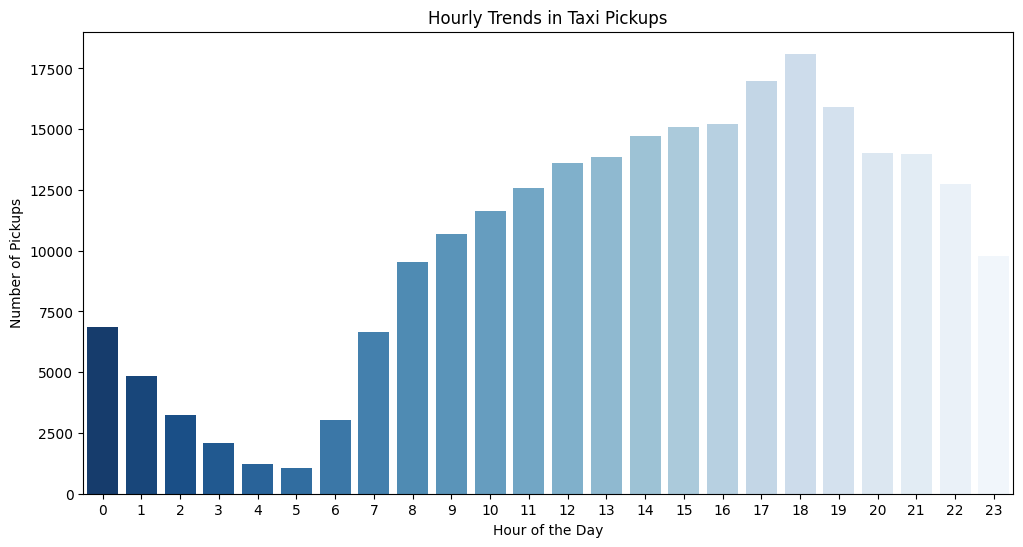

In [1145]:
# Find and show the hourly trends in taxi pickups
hourly_pickups = dc["hour"].value_counts().sort_index()

# Plot the trends
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="Blues_r")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in Taxi Pickups")
plt.xticks(range(24))  # Ensuring all hours (0-23) are displayed
plt.show()

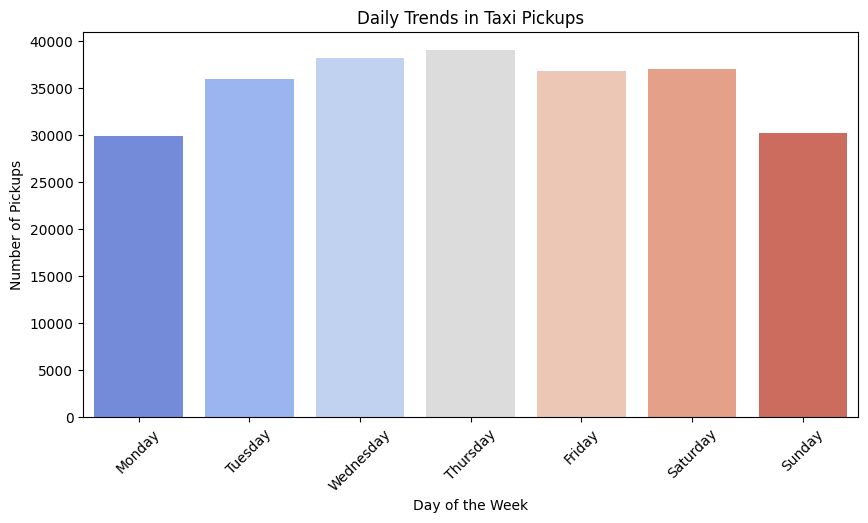

In [1149]:
# Find and show the daily trends in taxi pickups (days of the week)
dc["tpep_pickup_datetime"] = pd.to_datetime(dc["tpep_pickup_datetime"])
dc["pickup_day"] = dc["tpep_pickup_datetime"].dt.dayofweek  

# Define mapping for better readability
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 
               4: "Friday", 5: "Saturday", 6: "Sunday"}

# Replace numerical days with actual names
dc["pickup_day"] = dc["pickup_day"].map(day_mapping)

# Group by day and count pickups
daily_pickups = dc["pickup_day"].value_counts().reindex(day_mapping.values())

# Plot daily trends
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in Taxi Pickups")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


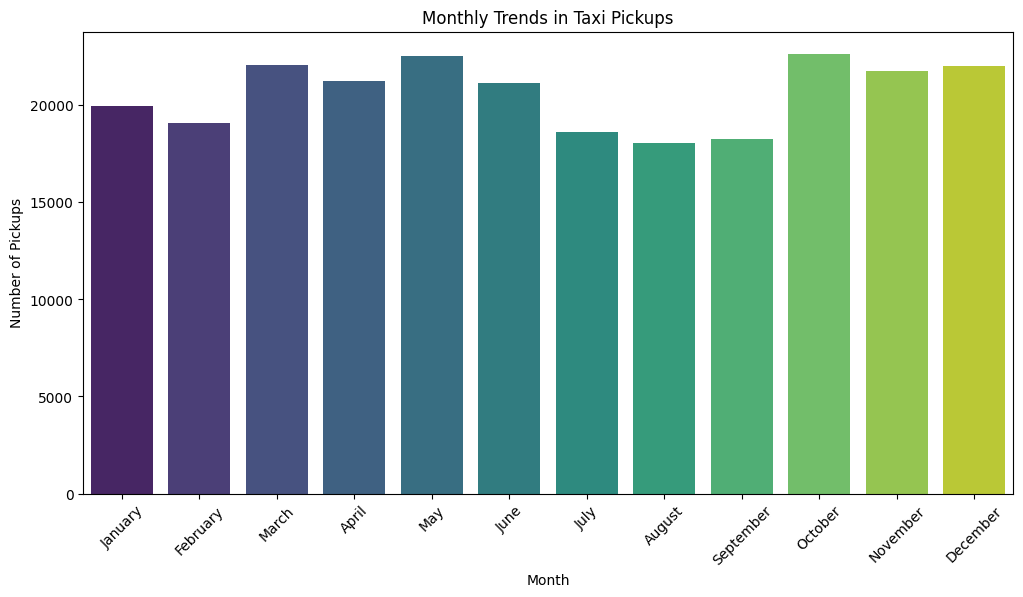

In [1151]:
# Show the monthly trends in pickups
dc["pickup_month"] = dc["tpep_pickup_datetime"].dt.month  

# Define mapping for better readability
month_mapping = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
                 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

# Replace numerical months with actual names
dc["pickup_month"] = dc["pickup_month"].map(month_mapping)

# Group by month and count pickups
monthly_pickups = dc["pickup_month"].value_counts().reindex(month_mapping.values())

# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [1155]:
columns_to_check = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Checking for zero values
zero_values = (dc[columns_to_check] == 0).sum()

# Checking for negative values
negative_values = (dc[columns_to_check] < 0).sum()

# Display results
print("Count of Zero Values:\n", zero_values)
print("\nCount of Negative Values:\n", negative_values)

Count of Zero Values:
 fare_amount         81
tip_amount       56090
total_amount        32
trip_distance     5620
dtype: int64

Count of Negative Values:
 fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


In [1173]:
#removing Fare mount 0 entities
dc = dc[~((dc["fare_amount"] == 0) & (dc["total_amount"] == 0))]

#many riders might not given any tips, so retaining the values as it is
#Total amount 0 entities are 32 are there. may be these are the records having cancelled trips, so removing th entities
dc = dc[dc["total_amount"] > 0]
dc = dc[dc["fare_amount"] > 0]

In [1175]:
#checking how many values are having trip distance and fare amount as ), these might be cancelled trip. removing these items
zero_distance_fare = dc[(dc["trip_distance"] == 0) & (dc["fare_amount"] == 0)]
print(f"Total records with trip_distance = 0 and fare_amount = 0: {zero_distance_fare.shape[0]}")
dc = dc[~((dc["trip_distance"] == 0) & (dc["fare_amount"] == 0))]

Total records with trip_distance = 0 and fare_amount = 0: 0


In [1177]:
zero_values = (dc[columns_to_check] == 0).sum()

# Checking for negative values
negative_values = (dc[columns_to_check] < 0).sum()

# Display results
print("Count of Zero Values:\n", zero_values)
print("\nCount of Negative Values:\n", negative_values)

Count of Zero Values:
 fare_amount          0
tip_amount       56013
total_amount         0
trip_distance     5578
dtype: int64

Count of Negative Values:
 fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


In [1183]:
dc[dc["trip_distance"] == 0]["fare_amount"].describe()

count    5578.000000
mean       26.387736
std        29.100191
min         0.010000
25%         7.900000
50%        17.045000
75%        30.925000
max       200.000000
Name: fare_amount, dtype: float64

In [1185]:
dc = dc[~((dc["trip_distance"] == 0) & (dc["fare_amount"] > 50))]

In [1187]:
zero_values = (dc[columns_to_check] == 0).sum()

# Checking for negative values
negative_values = (dc[columns_to_check] < 0).sum()

# Display results
print("Count of Zero Values:\n", zero_values)
print("\nCount of Negative Values:\n", negative_values)

Count of Zero Values:
 fare_amount          0
tip_amount       55582
total_amount         0
trip_distance     4713
dtype: int64

Count of Negative Values:
 fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


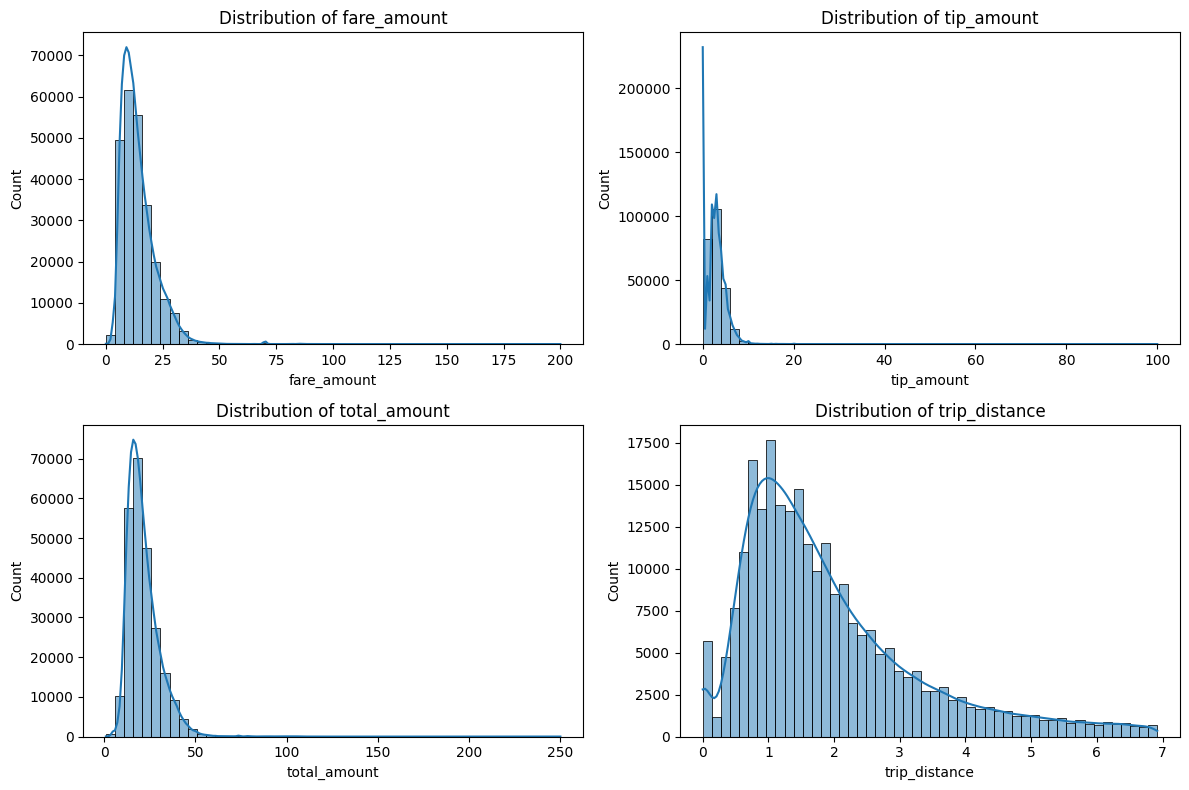

In [1189]:
# Analyse the above parameters
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

for i, col in enumerate(columns):
    sns.histplot(dc[col], bins=50, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

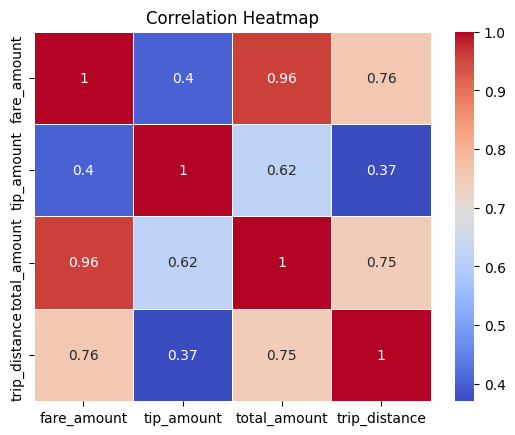

In [1191]:
corr = dc[["fare_amount", "tip_amount", "total_amount", "trip_distance"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [1193]:
dc_copy = dc.copy()

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [1196]:
# Create a df with non zero entries for the selected parameters.
# Define columns to check for zero values
columns_to_filter = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Remove rows where any of these columns have zero values
dc_filtered = dc[(dc[columns_to_filter] != 0).all(axis=1)].copy()

# Display the number of remaining records
print("Remaining records after filtering:", len(dc_filtered))

Remaining records after filtering: 189853


In [1203]:
valid_zero_distance = dc[(dc["trip_distance"] == 0) & (dc["fare_amount"] > 0)]

# Drop records where both trip_distance and fare_amount are zero
dc = dc[~((dc["trip_distance"] == 0) & (dc["fare_amount"] == 0))]

# Display results
print("Zero-distance trips with fare:", len(valid_zero_distance))
print("Total records after filtering:", len(dc_filtered))

Zero-distance trips with fare: 4713
Total records after filtering: 246408


In [1205]:
dc = dc[~((dc["trip_distance"] == 0) & (dc["fare_amount"] == 0))]

# Display the number of remaining records
print("Total records after filtering:", len(dc_filtered))

Total records after filtering: 246408


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

    Month  Total Revenue
0       1      411327.01
1       2      398005.26
2       3      463908.14
3       4      448212.30
4       5      487043.22
5       6      455896.37
6       7      391985.36
7       8      380326.69
8       9      405462.33
9      10      501154.46
10     11      479952.71
11     12      487247.96


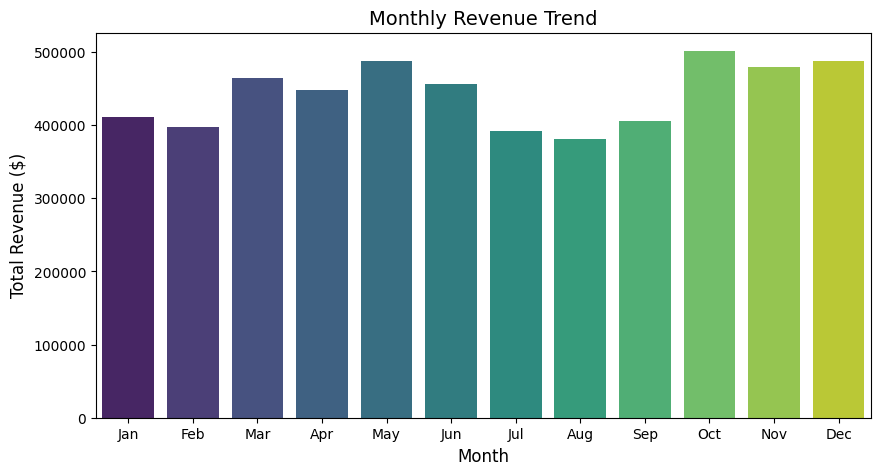

In [1207]:
# Group data by month and analyse monthly revenue
# Extract month from datetime and store in 'month' column
dc["month"] = dc["tpep_pickup_datetime"].dt.month
monthly_revenue = dc.groupby("month")["total_amount"].sum().reset_index()

# Rename columns for clarity
monthly_revenue.columns = ["Month", "Total Revenue"]

# Display the monthly revenue
print(monthly_revenue)
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x=monthly_revenue["Month"], y=monthly_revenue["Total Revenue"], palette="viridis")

# Formatting the plot
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Show the plot
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

   Quarter  Total Revenue  Proportion (%)
0        1     1273240.41       23.975806
1        2     1391151.89       26.196143
2        3     1177774.38       22.178129
3        4     1468355.13       27.649922


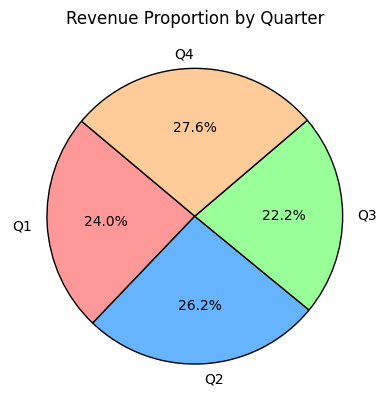

In [1209]:
# Calculate proportion of each quarter
# Extract quarter from pickup datetime
dc["quarter"] = dc["tpep_pickup_datetime"].dt.quarter
quarterly_revenue = dc.groupby("quarter")["total_amount"].sum().reset_index()

# Rename columns for clarity
quarterly_revenue.columns = ["Quarter", "Total Revenue"]

# Calculate proportion of each quarter
total_revenue = quarterly_revenue["Total Revenue"].sum()
quarterly_revenue["Proportion (%)"] = (quarterly_revenue["Total Revenue"] / total_revenue) * 100

# Display the results
print(quarterly_revenue)
plt.pie(
    quarterly_revenue["Total Revenue"],
    labels=["Q1", "Q2", "Q3", "Q4"],
    autopct="%1.1f%%",
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"],
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)

# Title
plt.title("Revenue Proportion by Quarter")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

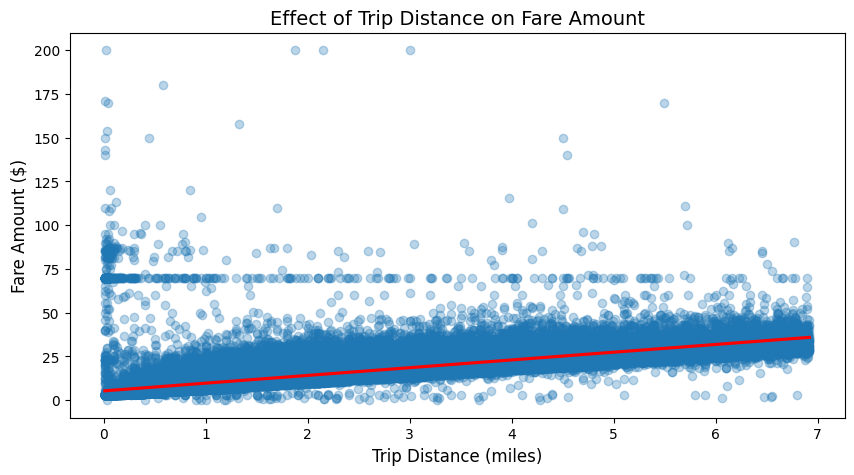

In [1214]:
# Show how trip fare is affected by distance
dc_filtered = dc[dc["trip_distance"] > 0].copy()
# Set figure size
plt.figure(figsize=(10, 5))

# Scatter plot with regression line
sns.regplot(x=dc_filtered["trip_distance"], y=dc_filtered["fare_amount"], scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})

# Labels and title
plt.xlabel("Trip Distance (miles)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Effect of Trip Distance on Fare Amount", fontsize=14)

# Show the plot
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

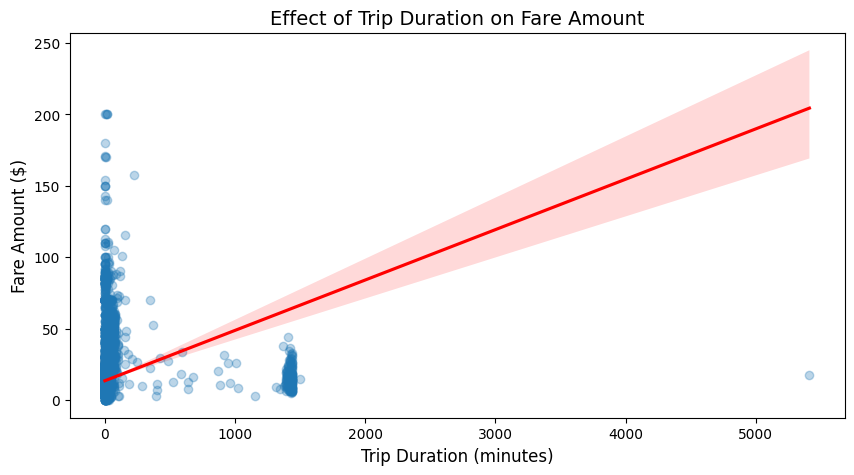

In [1224]:
# Show relationship between fare and trip duration

# Ensure datetime columns are in the correct format
dc["tpep_pickup_datetime"] = pd.to_datetime(dc["tpep_pickup_datetime"])
dc["tpep_dropoff_datetime"] = pd.to_datetime(dc["tpep_dropoff_datetime"])

# Calculate trip duration in minutes
dc["trip_duration"] = (dc["tpep_dropoff_datetime"] - dc["tpep_pickup_datetime"]).dt.total_seconds() / 60
dc_filtered_1 = dc[dc["trip_duration"] > 0].copy()
plt.figure(figsize=(10, 5))

# Scatter plot with regression line
sns.regplot(x=dc_filtered_1["trip_duration"], y=dc_filtered_1["fare_amount"], 
            scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})

# Labels and title
plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Effect of Trip Duration on Fare Amount", fontsize=14)

# Show the plot
plt.show()

passenger_count
1.0    193379
2.0     34334
3.0      8740
4.0      4740
5.0      3114
6.0      2101
Name: count, dtype: int64


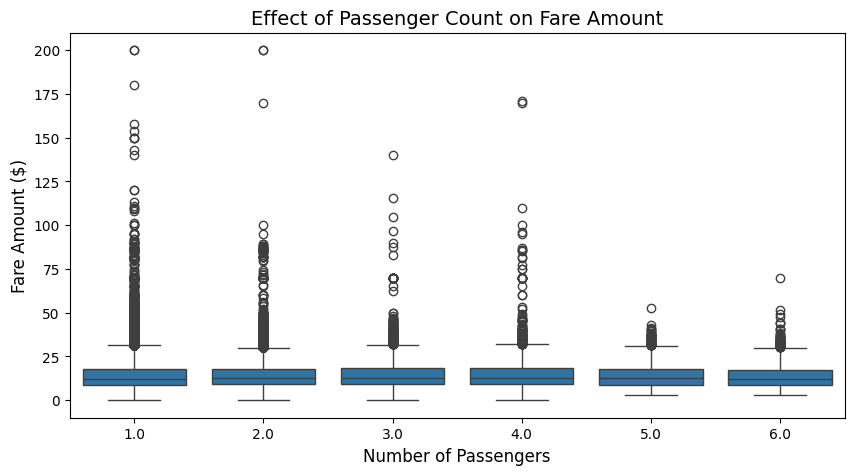

In [1226]:
# Show relationship between fare and number of passengers
dc_filtered = dc[dc["fare_amount"] > 0].copy()

# Check unique values in passenger count
print(dc_filtered["passenger_count"].value_counts())
dc_filtered = dc_filtered[dc_filtered["passenger_count"] > 0]

plt.figure(figsize=(10, 5))

# Boxplot: Fare vs. Passenger Count
sns.boxplot(x=dc_filtered["passenger_count"], y=dc_filtered["fare_amount"])

plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Effect of Passenger Count on Fare Amount", fontsize=14)

plt.show()

In [1228]:
correlation = dc_filtered["passenger_count"].corr(dc_filtered["fare_amount"])
print(f"Correlation between Passenger Count and Fare Amount: {correlation:.2f}")

Correlation between Passenger Count and Fare Amount: 0.01


          tip_amount  trip_distance
count  241695.000000  241695.000000
mean        2.734248       1.978205
std         2.276387       1.355282
min         0.000000       0.010000
25%         1.000000       1.000000
50%         2.700000       1.600000
75%         3.950000       2.550000
max       100.000000       6.920000


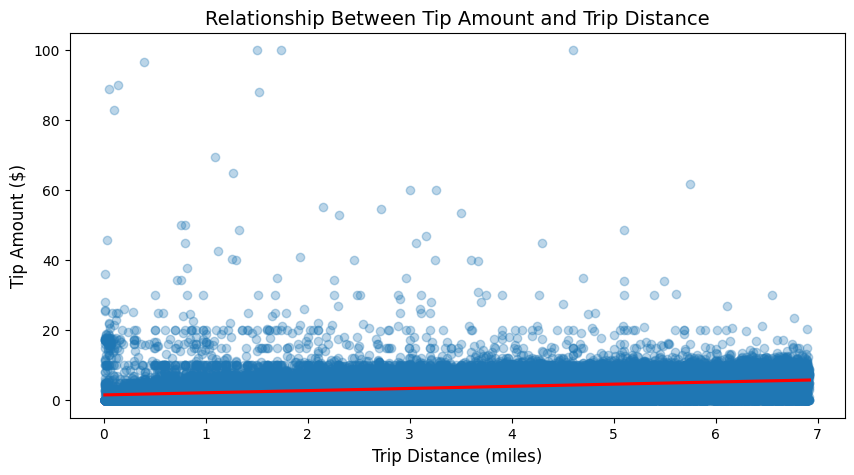

Correlation between Trip Distance and Tip Amount: 0.37


In [1230]:
# Show relationship between tip and trip distance
# Remove trips with zero or negative distance
dc_filtered = dc[dc["trip_distance"] > 0].copy()

# Remove negative tips (if any)
dc_filtered = dc_filtered[dc_filtered["tip_amount"] >= 0]

# Check summary statistics
print(dc_filtered[["tip_amount", "trip_distance"]].describe())
plt.figure(figsize=(10, 5))

# Scatter plot with regression line
sns.regplot(x=dc_filtered["trip_distance"], y=dc_filtered["tip_amount"], 
            scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})

# Labels and title
plt.xlabel("Trip Distance (miles)", fontsize=12)
plt.ylabel("Tip Amount ($)", fontsize=12)
plt.title("Relationship Between Tip Amount and Trip Distance", fontsize=14)
plt.show()
correlation = dc_filtered["trip_distance"].corr(dc_filtered["tip_amount"])
print(f"Correlation between Trip Distance and Tip Amount: {correlation:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    194392
2     41139
0      8026
4      1717
3      1134
Name: count, dtype: int64


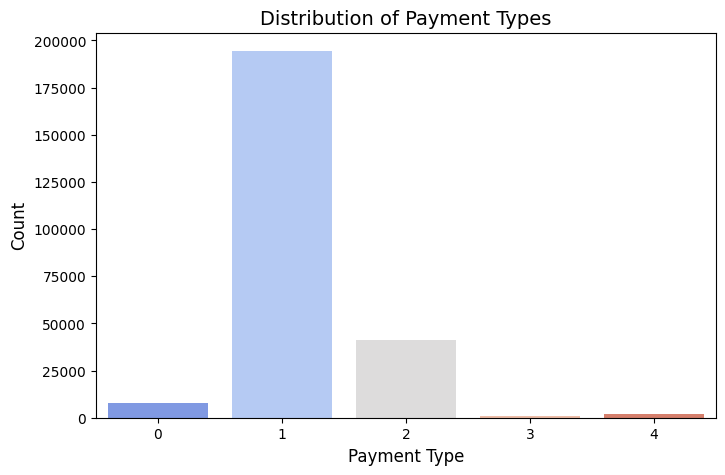

In [1234]:
# Analyse the distribution of different payment types (payment_type).
print(dc["payment_type"].value_counts())
plt.figure(figsize=(8, 5))

# Bar plot of payment types
sns.countplot(x=dc["payment_type"], palette="coolwarm")

# Labels and title
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Payment Types", fontsize=14)

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [1236]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/16.2 MB 8.4 MB/s eta 0:00:02
   ----------- ---------------------------- 4.5/16.2 MB 10.8 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/16.2 MB 8.4 MB/s eta 0:00:02
   -------------- ------------------------- 6.0/16.2 MB 7.2 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.2 MB 7.3 MB/s eta 0:00:02
   ---------------------- ----------------- 8.9/16.2 MB 7.1 MB/s eta 0:00:02
   ------------------------- -------------- 10.5/16.2 MB 7.0 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/16.2 MB 6.9 MB/s eta 0:00:01
   ------------------------------- -------- 12.8/16.2 MB 6.9 MB/s eta 0:00:01
   ----------------------------------- ---- 14.2/16.2 MB 6.8 MB/s eta 0:00:01
   -------------------------------------- - 15.5/16.2 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 6.6 MB/s eta 0:00:00

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1265]:
# import geopandas as gpd
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\Lenovo\Desktop\PGP_notes\Data toolkit\Assignment\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

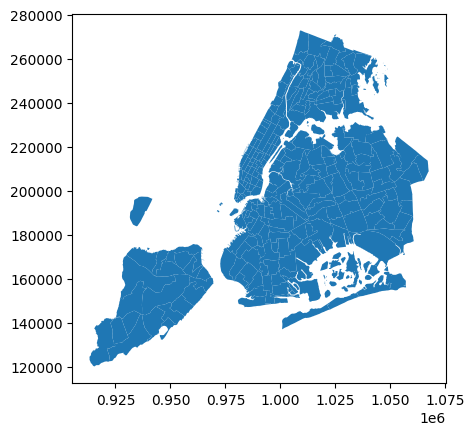

In [1268]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [1272]:
# Merge zones and trip records using locationID and PULocationID
dc = dc.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
dc.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
2         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
3         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
4         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24         1.0           161           237             1   
1           1.44         1.0           237           141             2   
2           0.54         1.0           143           142             2   
3           1.59         1.0            79           164             1   
4           3.16         1.0            79           256             1   

   fare_amount  ...  LocationID_y  borough_y  \
0          7.9  ...         161.0  Manhattan   
1         11.4  ...         237.0  Manhattan   
2          6.5  ...         143.0  Manhattan   
3         11.4  ...          79.0  Manhattan   
4         19.1  ...          79.0  Manhattan   

                                          geometry_y  OBJECTID  Shape_Leng  \
0  POLYGON ((991081.026 214453.698, 990952.644 21...     161.0    0.035804   
1  POLYGON ((993633.442 216961.016, 993507.232 21...     237.0    0.042213   
2  POLYGON ((989338.1 223572.253, 989368.225 2235...     143.0    0.054180   
3  POLYGON ((988746.067 202151.955, 988733.885 20...      79.0    0.042625   
4  POLYGON ((988746.067 202151.955, 988733.885 20...      79.0    0.042625   

   Shape_Area                   zone LocationID    borough  \
0    0.000072         Midtown Center      161.0  Manhattan   
1    0.000096  Upper East Side South      237.0  Manhattan   
2    0.000151    Lincoln Square West      143.0  Manhattan   
3    0.000108           East Village       79.0  Manhattan   
4    0.000108           East Village       79.0  Manhattan   

                                            geometry  
0  POLYGON ((991081.026 214453.698, 990952.644 21...  
1  POLYGON ((993633.442 216961.016, 993507.232 21...  
2  POLYGON ((989338.1 223572.253, 989368.225 2235...  
3  POLYGON ((988746.067 202151.955, 988733.885 20...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...  

[5 rows x 46 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

Top 5 Pickup Locations:
     PULocationID  trip_count
206           237       12848
138           161       12270
205           236       11551
139           162        9546
159           186        9054

Top 5 Dropoff Locations:
     DOLocationID  trip_count
209           236       12093
210           237       11490
140           161       10322
149           170        7812
124           142        7670


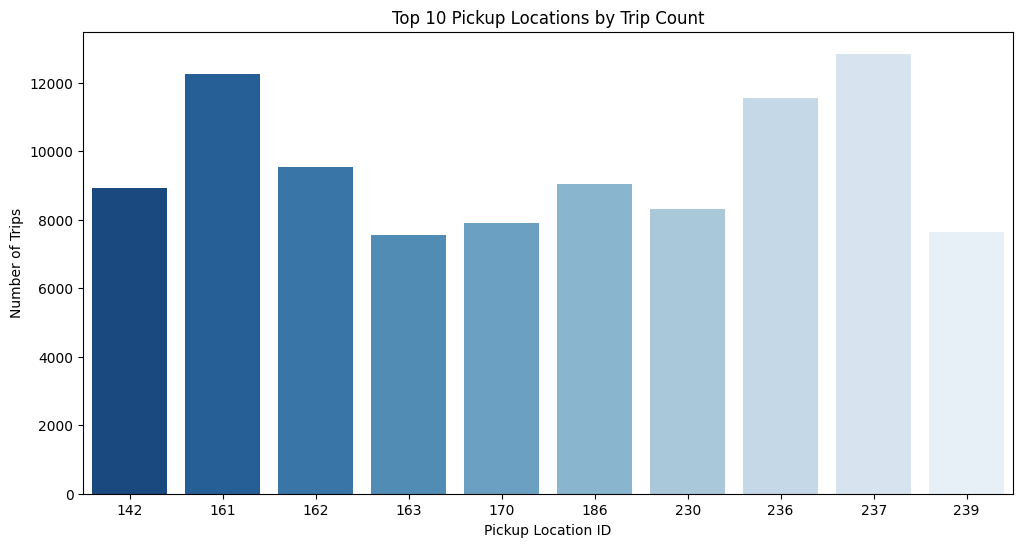

In [1275]:
# Group data by location and calculate the number of trips
pickup_counts = dc.groupby("PULocationID").size().reset_index(name="trip_count")

# Group by dropoff location and count trips
dropoff_counts = dc.groupby("DOLocationID").size().reset_index(name="trip_count")

# Display results
print("Top 5 Pickup Locations:")
print(pickup_counts.sort_values(by="trip_count", ascending=False).head())

print("\nTop 5 Dropoff Locations:")
print(dropoff_counts.sort_values(by="trip_count", ascending=False).head())
top_pickups = pickup_counts.sort_values(by="trip_count", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickups["PULocationID"], y=top_pickups["trip_count"], palette="Blues_r")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.title("Top 10 Pickup Locations by Trip Count")
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [1277]:
# Merge trip counts back to the zones GeoDataFrame

# Group trip data by pickup location and count trips
pickup_counts = dc.groupby("PULocationID").size().reset_index(name="trip_count")

# Merge trip counts with GeoDataFrame
zones = zones.merge(pickup_counts, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values with 0 (some zones may not have trips)
zones["trip_count"] = zones["trip_count"].fillna(0)

# Drop duplicate column "PULocationID" after merging
zones.drop(columns=["PULocationID"], inplace=True)

# Display first few rows to verify
print(zones.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        11.0  
1         0.0  
2         6.0  
3       318.0  
4         0.0  


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

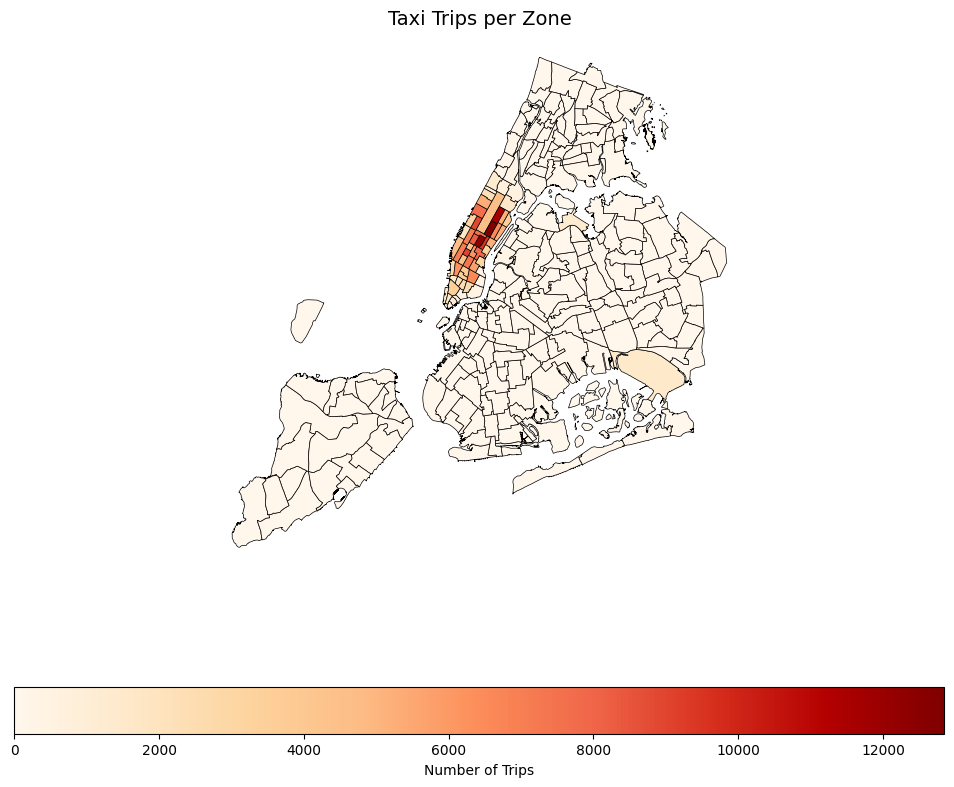

In [1284]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Plot the zones GeoDataFrame with trip counts
zones.plot(column="trip_count", 
           cmap="OrRd", 
           linewidth=0.5, 
           edgecolor="black", 
           legend=True, 
           legend_kwds={"label": "Number of Trips", "orientation": "horizontal"},
           ax=ax)


# Plot the map and display it
# Add a title
ax.set_title("Taxi Trips per Zone", fontsize=14)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show the plot
plt.show()


In [1288]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by="trip_count", ascending=False)
print(zones_sorted[["zone", "trip_count"]].head(10))  # Show top 10 zones

                             zone  trip_count
236         Upper East Side South     12848.0
160                Midtown Center     12270.0
235         Upper East Side North     11551.0
161                  Midtown East      9546.0
185  Penn Station/Madison Sq West      9054.0
141           Lincoln Square East      8920.0
229     Times Sq/Theatre District      8304.0
169                   Murray Hill      7903.0
238         Upper West Side South      7652.0
162                 Midtown North      7565.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [1294]:
dc.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'Airport_fee', 'pickup_day',
       'pickup_month', 'month', 'quarter', 'trip_duration', 'OBJECTID_x',
       'Shape_Leng_x', 'Shape_Area_x', 'zone_x', 'LocationID_x', 'borough_x',
       'geometry_x', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y', 'zone_y',
       'LocationID_y', 'borough_y', 'geometry_y', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry'],
      dtype='object')

In [1296]:
# Find routes which have the slowest speeds at different times of the day
dc["trip_duration"] = (dc["tpep_dropoff_datetime"] - dc["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Extract the hour of the pickup
dc["hour"] = dc["tpep_pickup_datetime"].dt.hour

# Group by route (PULocationID -> DOLocationID) and hour
route_speed = dc.groupby(["PULocationID", "DOLocationID", "hour"]).agg(
    total_distance=("trip_distance", "sum"),
    avg_duration=("trip_duration", "mean")
).reset_index()

# Calculate average speed (Distance / Duration)
route_speed["speed_kph"] = (route_speed["total_distance"] / route_speed["avg_duration"]) * 60

# Remove routes with very short durations to avoid unrealistic speeds
route_speed = route_speed[route_speed["avg_duration"] > 1]

# Find the slowest routes (lowest speeds)
slowest_routes = route_speed.sort_values(by="speed_kph").head(10)

# Display slowest routes
print(slowest_routes)


       PULocationID  DOLocationID  hour  total_distance  avg_duration  \
51364           264           216     6             0.0     41.233333   
40826           233           186    21             0.0     26.583333   
49488           262            13    15             0.0     39.033333   
13755           107           209     5             0.0     12.833333   
13753           107           197    22             0.0     31.066667   
49494           262            24    18             0.0     21.600000   
8867             79           152     4             0.0     24.766667   
40695           233           158    13             0.0     27.166667   
25808           157            94    23             0.0     50.066667   
25807           157            88     7             0.0     27.066667   

       speed_kph  
51364        0.0  
40826        0.0  
49488        0.0  
13755        0.0  
13753        0.0  
49494        0.0  
8867         0.0  
40695        0.0  
25808        0.0  
25807 

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

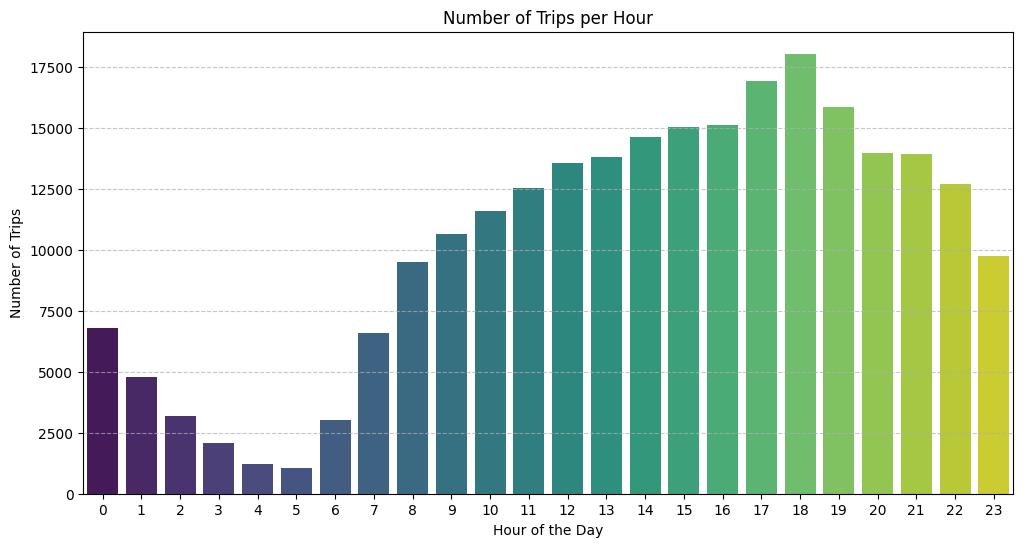

Busiest Hour: 18:00 with 18056 trips.


In [1298]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = dc["hour"].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Hour")
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
busiest_hour = hourly_trips.idxmax()
max_trips = hourly_trips.max()
print(f"Busiest Hour: {busiest_hour}:00 with {max_trips} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [1321]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.0075
Actual_trips_count = hourly_trips/sample_fraction
Actual_trips_count = Actual_trips_count.astype(int)
Top_5_busy_hours = Actual_trips_count.sort_values(ascending = False).head(5)
print(Top_5_busy_hours)

hour
18    2407466
17    2256400
19    2115066
16    2018533
15    2005866
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [1329]:
dc.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
2         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
3         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
4         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24         1.0           161           237             1   
1           1.44         1.0           237           141             2   
2           0.54         1.0           143           142             2   
3           1.59         1.0            79           164             1   
4           3.16         1.0            79           256             1   

   fare_amount  ...  LocationID_y  borough_y  \
0          7.9  ...         161.0  Manhattan   
1         11.4  ...         237.0  Manhattan   
2          6.5  ...         143.0  Manhattan   
3         11.4  ...          79.0  Manhattan   
4         19.1  ...          79.0  Manhattan   

                                          geometry_y  OBJECTID  Shape_Leng  \
0  POLYGON ((991081.026 214453.698, 990952.644 21...     161.0    0.035804   
1  POLYGON ((993633.442 216961.016, 993507.232 21...     237.0    0.042213   
2  POLYGON ((989338.1 223572.253, 989368.225 2235...     143.0    0.054180   
3  POLYGON ((988746.067 202151.955, 988733.885 20...      79.0    0.042625   
4  POLYGON ((988746.067 202151.955, 988733.885 20...      79.0    0.042625   

   Shape_Area                   zone LocationID    borough  \
0    0.000072         Midtown Center      161.0  Manhattan   
1    0.000096  Upper East Side South      237.0  Manhattan   
2    0.000151    Lincoln Square West      143.0  Manhattan   
3    0.000108           East Village       79.0  Manhattan   
4    0.000108           East Village       79.0  Manhattan   

                                            geometry  
0  POLYGON ((991081.026 214453.698, 990952.644 21...  
1  POLYGON ((993633.442 216961.016, 993507.232 21...  
2  POLYGON ((989338.1 223572.253, 989368.225 2235...  
3  POLYGON ((988746.067 202151.955, 988733.885 20...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...  

[5 rows x 46 columns]

In [1335]:
# Compare traffic trends for the week days and weekends
dc["pickup_datetime"] = pd.to_datetime(dc["tpep_pickup_datetime"])
dc["day_of_week"] = dc["pickup_datetime"].dt.dayofweek
dc["day_type"] = dc["day_of_week"].apply(lambda x: "Weekday" if x < 5 else "Weekend")
traffic_trends = dc["day_type"].value_counts()
print("Traffic Trends (Weekdays vs. Weekends):")
print(traffic_trends)

Traffic Trends (Weekdays vs. Weekends):
day_type
Weekday    179410
Weekend     67103
Name: count, dtype: int64


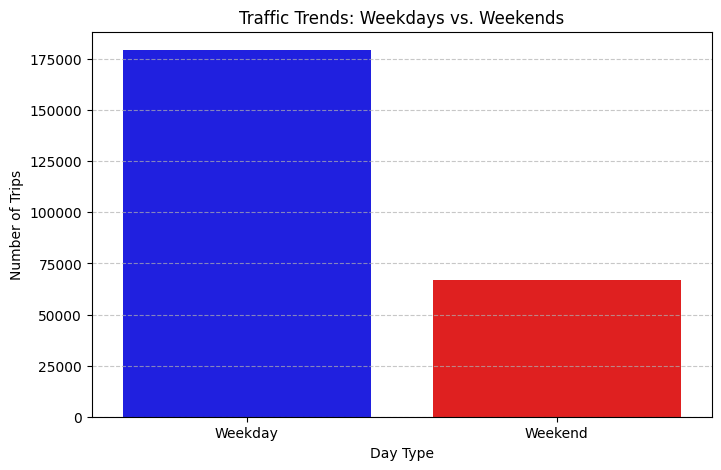

In [1337]:
plt.figure(figsize=(8, 5))
sns.barplot(x=traffic_trends.index, y=traffic_trends.values, palette=["blue", "red"])
plt.xlabel("Day Type")
plt.ylabel("Number of Trips")
plt.title("Traffic Trends: Weekdays vs. Weekends")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [1340]:
# Find top 10 pickup and dropoff zones
top_pickup_zones = dc["PULocationID"].value_counts().head(10)
top_dropoff_zones = dc["DOLocationID"].value_counts().head(10)
print("Top 10 Pickup Zones:\n", top_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)


Top 10 Pickup Zones:
 PULocationID
237    12848
161    12270
236    11551
162     9546
186     9054
142     8920
230     8304
170     7903
239     7652
163     7565
Name: count, dtype: int64

Top 10 Dropoff Zones:
 DOLocationID
236    12093
237    11490
161    10322
170     7812
142     7670
239     7408
162     7379
230     7245
141     7005
68      6755
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

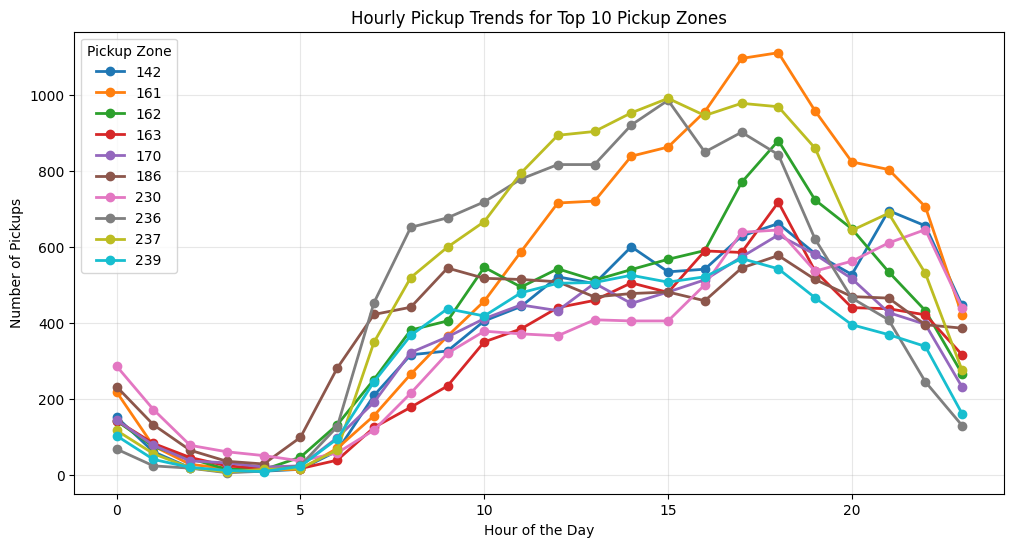

In [1342]:
dc["hour"] = dc["pickup_datetime"].dt.hour

# Filter data for top pickup zones
top_pickup_data = dc[dc["PULocationID"].isin(top_pickup_zones.index)]

# Group by hour and pickup zone
hourly_pickup_trends = top_pickup_data.groupby(["hour", "PULocationID"]).size().unstack()

# Plot Pickup Trends
plt.figure(figsize=(12, 6))
hourly_pickup_trends.plot(kind="line", marker="o", colormap="tab10", linewidth=2, figsize=(12, 6))
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Pickup Trends for Top 10 Pickup Zones")
plt.legend(title="Pickup Zone")
plt.grid(alpha=0.3)
plt.show()

<Figure size 1200x600 with 0 Axes>

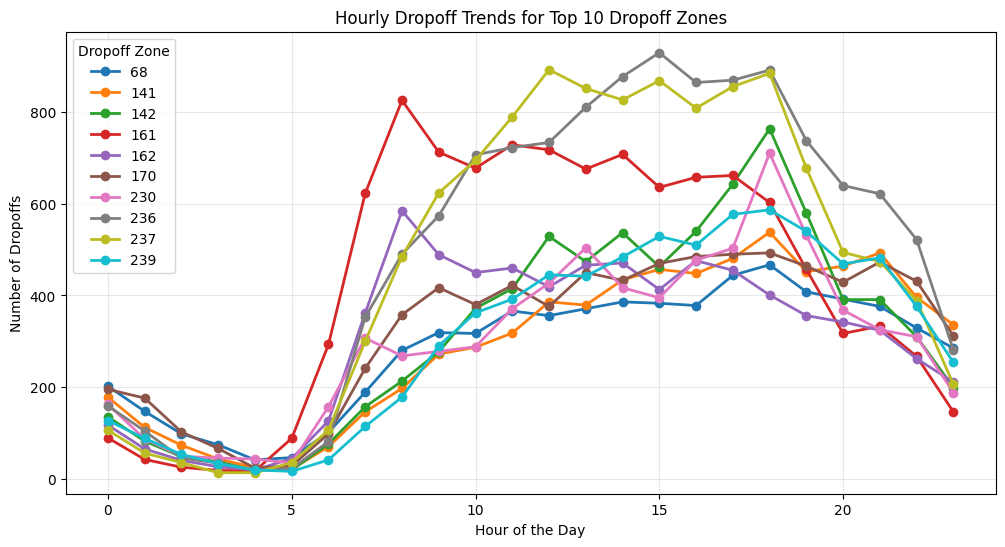

In [1344]:
top_dropoff_data = dc[dc["DOLocationID"].isin(top_dropoff_zones.index)]

# Group by hour and dropoff zone
hourly_dropoff_trends = top_dropoff_data.groupby(["hour", "DOLocationID"]).size().unstack()

# Plot Dropoff Trends
plt.figure(figsize=(12, 6))
hourly_dropoff_trends.plot(kind="line", marker="o", colormap="tab10", linewidth=2, figsize=(12, 6))
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Dropoffs")
plt.title("Hourly Dropoff Trends for Top 10 Dropoff Zones")
plt.legend(title="Dropoff Zone")
plt.grid(alpha=0.3)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [1349]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = dc["PULocationID"].value_counts()
dropoff_counts = dc["DOLocationID"].value_counts()

# Create a DataFrame for easy manipulation
zone_ratios = pd.DataFrame({
    "pickups": pickup_counts,
    "dropoffs": dropoff_counts
}).fillna(0)  # Fill NaN values with 0 if a zone has only pickups or dropoffs

# Calculate the pickup/dropoff ratio
zone_ratios["pickup_drop_ratio"] = zone_ratios["pickups"] / (zone_ratios["dropoffs"] + 1)

# Sort by ratio
highest_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=False).head(10)
lowest_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=True).head(10)

# Display results
print("Top 10 Zones with Highest Pickup/Dropoff Ratios:")
print(highest_ratios)

print("\nTop 10 Zones with Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios)

Top 10 Zones with Highest Pickup/Dropoff Ratios:
     pickups  dropoffs  pickup_drop_ratio
138   1216.0     231.0           5.241379
132   1555.0     447.0           3.470982
56     120.0      43.0           2.727273
60      11.0       4.0           2.200000
70     197.0      92.0           2.118280
150      4.0       1.0           2.000000
185      6.0       2.0           2.000000
81       6.0       2.0           2.000000
182     15.0       7.0           1.875000
91      17.0       9.0           1.700000

Top 10 Zones with Lowest Pickup/Dropoff Ratios:
     pickups  dropoffs  pickup_drop_ratio
253      0.0       1.0           0.000000
73       0.0      10.0           0.000000
118      0.0       1.0           0.000000
8        0.0       4.0           0.000000
206      0.0       1.0           0.000000
183      0.0       4.0           0.000000
184      0.0       1.0           0.000000
120      0.0       6.0           0.000000
124      3.0      49.0           0.060000
139      2.0      32

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1353]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Ensure datetime format
dc["pickup_datetime"] = pd.to_datetime(dc["tpep_pickup_datetime"])
dc["dropoff_datetime"] = pd.to_datetime(dc["tpep_dropoff_datetime"])

# Extract the hour of pickup and dropoff
dc["pickup_hour"] = dc["pickup_datetime"].dt.hour
dc["dropoff_hour"] = dc["dropoff_datetime"].dt.hour

# Define night hours (11 PM to 5 AM)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter only for trips happening during night hours
night_trips = dc[(dc["pickup_hour"].isin(night_hours)) | (dc["dropoff_hour"].isin(night_hours))]

# Count pickups and dropoffs per zone
night_pickups = night_trips["PULocationID"].value_counts().rename("night_pickups")
night_dropoffs = night_trips["DOLocationID"].value_counts().rename("night_dropoffs")

# Combine into a DataFrame
night_traffic = pd.DataFrame({"night_pickups": night_pickups, "night_dropoffs": night_dropoffs}).fillna(0)

# Sort and get top 10 zones
top_night_pickup_zones = night_traffic.sort_values(by="night_pickups", ascending=False).head(10)
top_night_dropoff_zones = night_traffic.sort_values(by="night_dropoffs", ascending=False).head(10)

# Display results
print("Top 10 Pickup Zones (11 PM - 5 AM):")
print(top_night_pickup_zones)

print("\nTop 10 Dropoff Zones (11 PM - 5 AM):")
print(top_night_dropoff_zones)


Top 10 Pickup Zones (11 PM - 5 AM):
     night_pickups  night_dropoffs
79          2492.0          1364.0
249         2037.0           765.0
48          1576.0          1100.0
148         1507.0           733.0
114         1370.0           408.0
230         1254.0           676.0
186         1073.0           637.0
164          974.0           607.0
107          966.0           916.0
68           944.0           944.0

Top 10 Dropoff Zones (11 PM - 5 AM):
     night_pickups  night_dropoffs
79          2492.0          1364.0
48          1576.0          1100.0
170          621.0           963.0
68           944.0           944.0
107          966.0           916.0
141          540.0           854.0
263          546.0           824.0
249         2037.0           765.0
236          307.0           755.0
148         1507.0           733.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [1356]:
# Filter for night hours (11 PM to 5 AM)

dc["pickup_hour"] = dc["pickup_datetime"].dt.hour

# Define night (11 PM - 5 AM) and day (5 AM - 11 PM) hours
night_hours = list(range(23, 24)) + list(range(0, 6))
day_hours = list(range(6, 23))

# Filter night and day trips
night_revenue = dc[dc["pickup_hour"].isin(night_hours)]["total_amount"].sum()
day_revenue = dc[dc["pickup_hour"].isin(day_hours)]["total_amount"].sum()

# Calculate total revenue
total_revenue = night_revenue + day_revenue

# Compute revenue share percentages
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Display results
print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share (5 AM - 11 PM): {day_revenue_share:.2f}%")

Nighttime Revenue Share (11 PM - 5 AM): 11.95%
Daytime Revenue Share (5 AM - 11 PM): 88.05%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

passenger_count
1.0    11.610375
2.0     7.154509
3.0     4.811251
4.0     5.726116
5.0     1.681896
6.0     1.361466
Name: fare_per_mile_per_passenger, dtype: float64


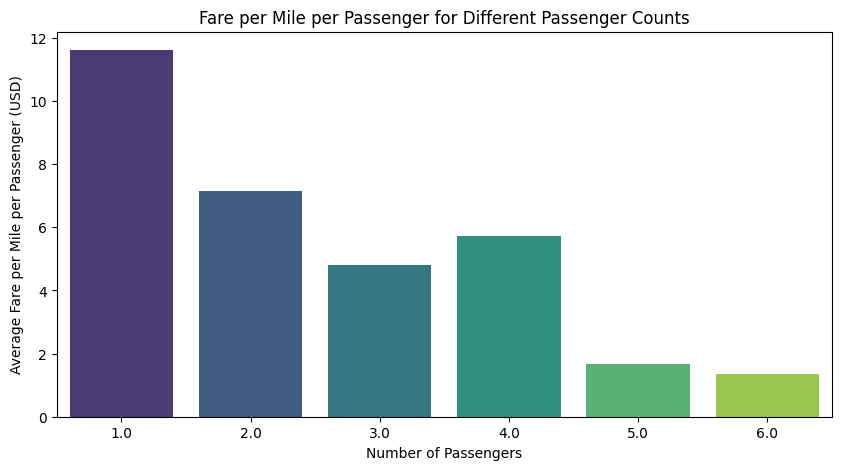

In [1358]:
# Analyse the fare per mile per passenger for different passenger counts
# Remove trips with zero/negative fare_amount or trip_distance
dc_filtered = dc[(dc["fare_amount"] > 0) & (dc["trip_distance"] > 0) & (dc["passenger_count"] > 0)]

# Calculate fare per mile
dc_filtered["fare_per_mile"] = dc_filtered["fare_amount"] / dc_filtered["trip_distance"]

# Calculate fare per mile per passenger
dc_filtered["fare_per_mile_per_passenger"] = dc_filtered["fare_per_mile"] / dc_filtered["passenger_count"]

# Group by passenger count and calculate average fare per mile per passenger
avg_fare_per_mile_per_passenger = dc_filtered.groupby("passenger_count")["fare_per_mile_per_passenger"].mean()

# Display the results
print(avg_fare_per_mile_per_passenger)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_fare_per_mile_per_passenger.index, y=avg_fare_per_mile_per_passenger.values, palette="viridis")

# Labels and title
plt.xlabel("Number of Passengers")
plt.ylabel("Average Fare per Mile per Passenger (USD)")
plt.title("Fare per Mile per Passenger for Different Passenger Counts")
plt.show()




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

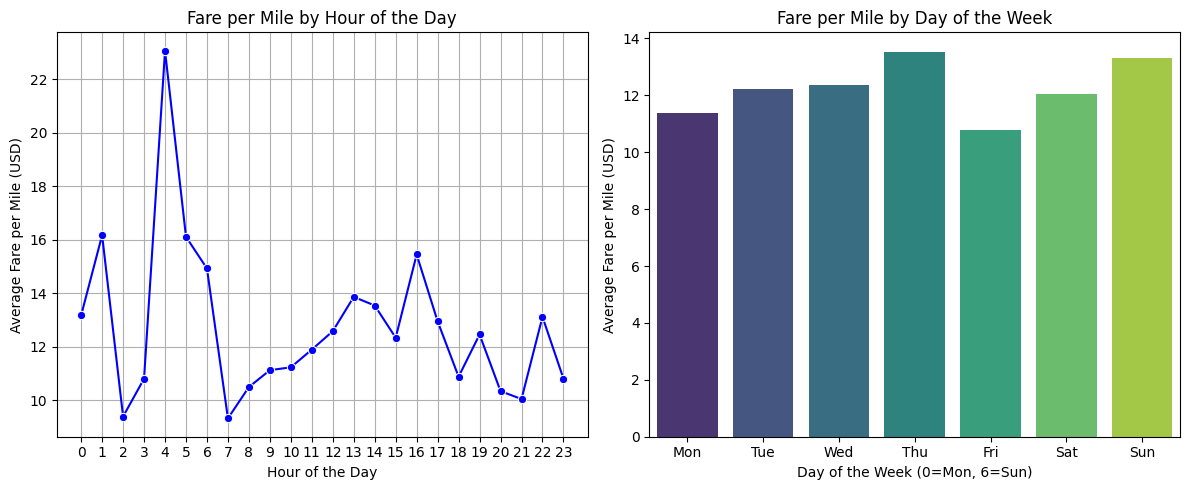

In [1361]:
# Compare the average fare per mile for different days and for different times of the day
dc["hour"] = dc["pickup_datetime"].dt.hour
dc["day_of_week"] = dc["pickup_datetime"].dt.dayofweek  # Monday = 0, Sunday = 6

# Remove trips with zero/negative fare_amount or trip_distance
dc_filtered = dc[(dc["fare_amount"] > 0) & (dc["trip_distance"] > 0)]

# Calculate fare per mile
dc_filtered["fare_per_mile"] = dc_filtered["fare_amount"] / dc_filtered["trip_distance"]

# Average fare per mile by hour of the day
avg_fare_per_mile_by_hour = dc_filtered.groupby("hour")["fare_per_mile"].mean()

# Average fare per mile by day of the week
avg_fare_per_mile_by_day = dc_filtered.groupby("day_of_week")["fare_per_mile"].mean()

# --- Visualization ---

plt.figure(figsize=(12, 5))

# Plot hourly trend
plt.subplot(1, 2, 1)
sns.lineplot(x=avg_fare_per_mile_by_hour.index, y=avg_fare_per_mile_by_hour.values, marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid()

# Plot daily trend
plt.subplot(1, 2, 2)
sns.barplot(x=avg_fare_per_mile_by_day.index, y=avg_fare_per_mile_by_day.values, palette="viridis")
plt.xlabel("Day of the Week (0=Mon, 6=Sun)")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Fare per Mile by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

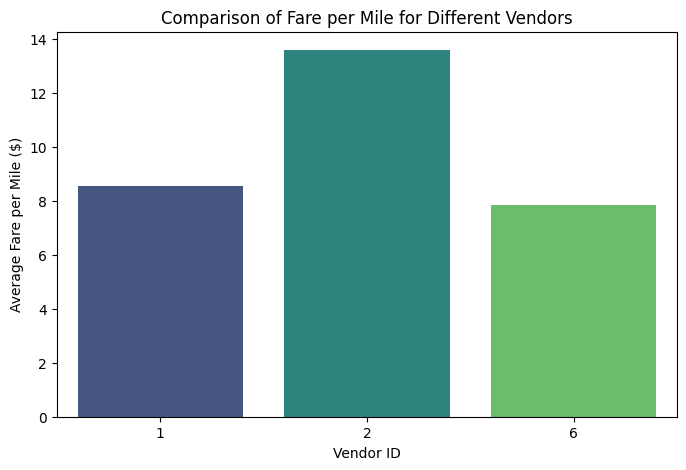

In [1383]:
# Compare fare per mile for different vendors
dc_filtered = dc[dc["trip_distance"] > 0].copy()  
dc_filtered["fare_per_mile"] = dc_filtered["fare_amount"] / dc_filtered["trip_distance"]

# Calculate average fare per mile for each Vendor
vendor_fare_mile = dc_filtered.groupby("VendorID")["fare_per_mile"].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=vendor_fare_mile.index, y=vendor_fare_mile.values, palette="viridis")
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Comparison of Fare per Mile for Different Vendors")
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


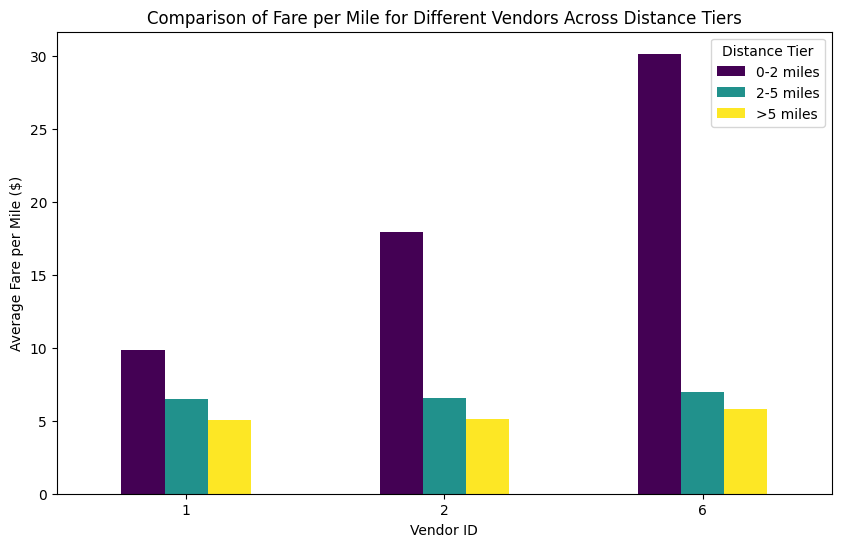

In [1385]:
# Defining distance tiers
bins = [0, 2, 5, float('inf')]  # 0-2 miles, 2-5 miles, >5 miles
labels = ["0-2 miles", "2-5 miles", ">5 miles"]
dc_filtered["distance_tier"] = pd.cut(dc_filtered["trip_distance"], bins=bins, labels=labels, right=False)

# Group by VendorID and Distance Tier to calculate average fare per mile
tiered_fare_rates = dc_filtered.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().unstack()

# Plot the results
tiered_fare_rates.plot(kind="bar", figsize=(10, 6), colormap="viridis")

plt.xlabel("Vendor ID")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Comparison of Fare per Mile for Different Vendors Across Distance Tiers")
plt.xticks(rotation=0)
plt.legend(title="Distance Tier")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

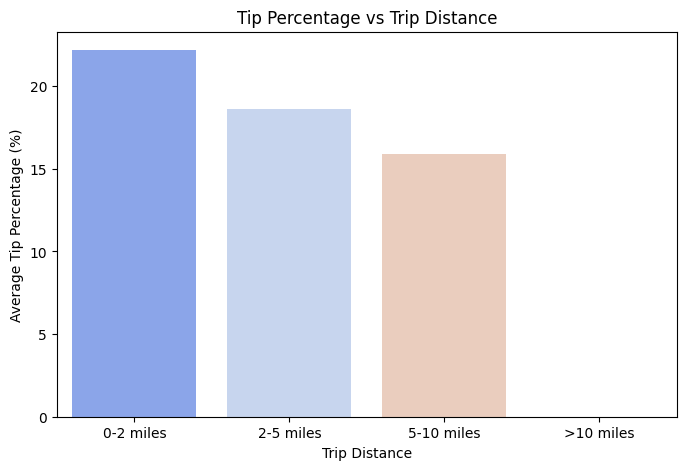

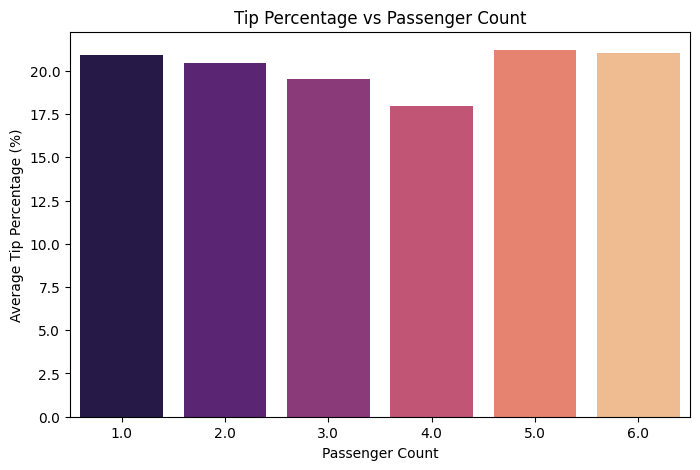

In [1387]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
dc_filtered = dc[dc["fare_amount"] > 0].copy()
dc_filtered["tip_percentage"] = (dc_filtered["tip_amount"] / dc_filtered["fare_amount"]) * 100
bins = [0, 2, 5, 10, float('inf')]
labels = ["0-2 miles", "2-5 miles", "5-10 miles", ">10 miles"]
dc_filtered["distance_tier"] = pd.cut(dc_filtered["trip_distance"], bins=bins, labels=labels, right=False)

# Calculate average tip percentage per distance tier
tip_by_distance = dc_filtered.groupby("distance_tier")["tip_percentage"].mean()

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_by_distance.index, y=tip_by_distance.values, palette="coolwarm")
plt.xlabel("Trip Distance")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage vs Trip Distance")
plt.show()
# Calculate average tip percentage for different passenger counts
tip_by_passengers = dc_filtered.groupby("passenger_count")["tip_percentage"].mean()

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_by_passengers.index, y=tip_by_passengers.values, palette="magma")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage vs Passenger Count")
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

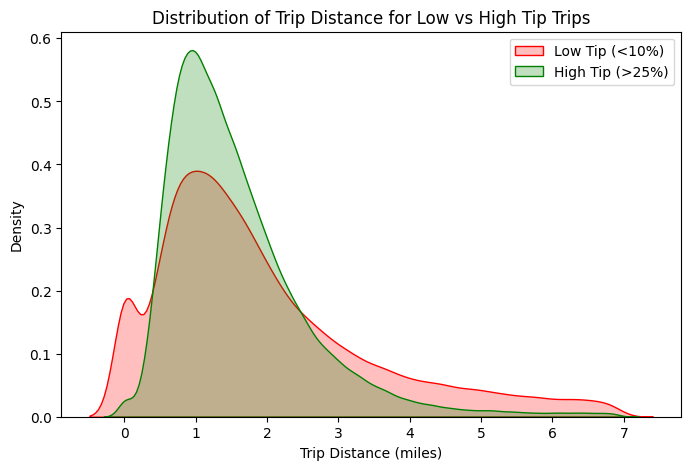

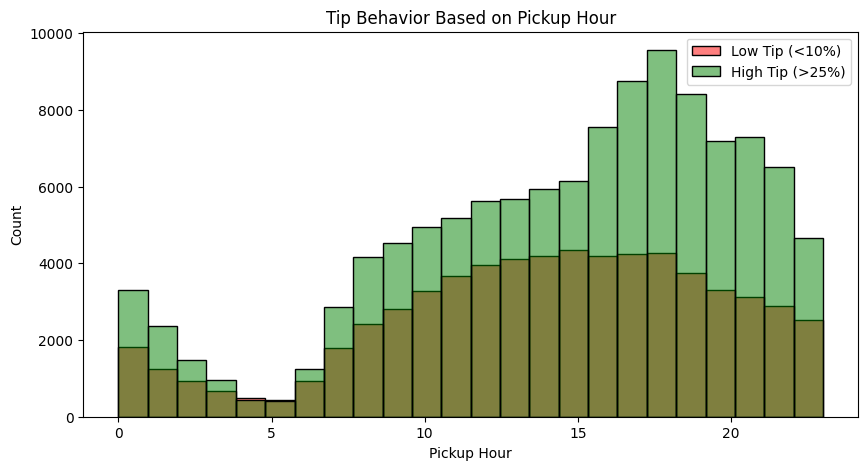

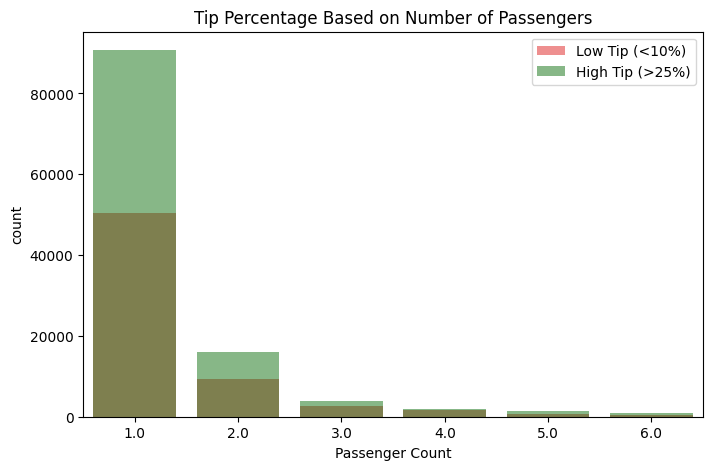

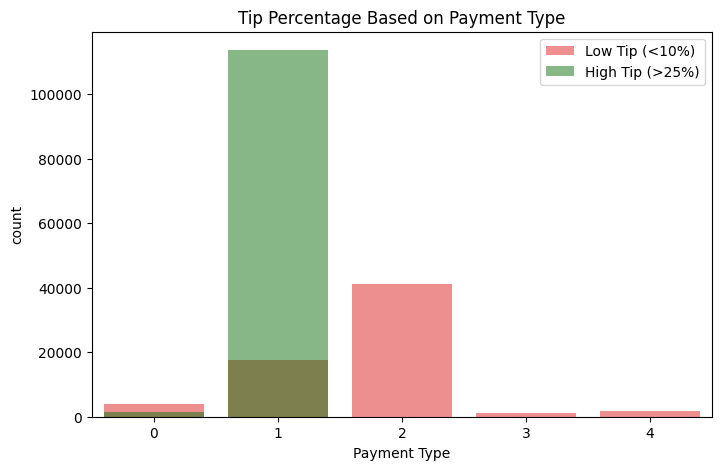

In [1394]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
dc_filtered["tip_percentage"] = (dc_filtered["tip_amount"] / dc_filtered["fare_amount"]) * 100
low_tip_trips = dc_filtered[dc_filtered["tip_percentage"] < 10]
high_tip_trips = dc_filtered[dc_filtered["tip_percentage"] > 25]
plt.figure(figsize=(8, 5))
sns.kdeplot(low_tip_trips["trip_distance"], label="Low Tip (<10%)", shade=True, color="red")
sns.kdeplot(high_tip_trips["trip_distance"], label="High Tip (>25%)", shade=True, color="green")
plt.xlabel("Trip Distance (miles)")
plt.title("Distribution of Trip Distance for Low vs High Tip Trips")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(low_tip_trips["pickup_hour"], bins=24, label="Low Tip (<10%)", color="red", alpha=0.5)
sns.histplot(high_tip_trips["pickup_hour"], bins=24, label="High Tip (>25%)", color="green", alpha=0.5)
plt.xlabel("Pickup Hour")
plt.title("Tip Behavior Based on Pickup Hour")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(x="passenger_count", data=low_tip_trips, color="red", alpha=0.5, label="Low Tip (<10%)")
sns.countplot(x="passenger_count", data=high_tip_trips, color="green", alpha=0.5, label="High Tip (>25%)")
plt.xlabel("Passenger Count")
plt.title("Tip Percentage Based on Number of Passengers")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(x="payment_type", data=low_tip_trips, color="red", alpha=0.5, label="Low Tip (<10%)")
sns.countplot(x="payment_type", data=high_tip_trips, color="green", alpha=0.5, label="High Tip (>25%)")
plt.xlabel("Payment Type")
plt.title("Tip Percentage Based on Payment Type")
plt.legend()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

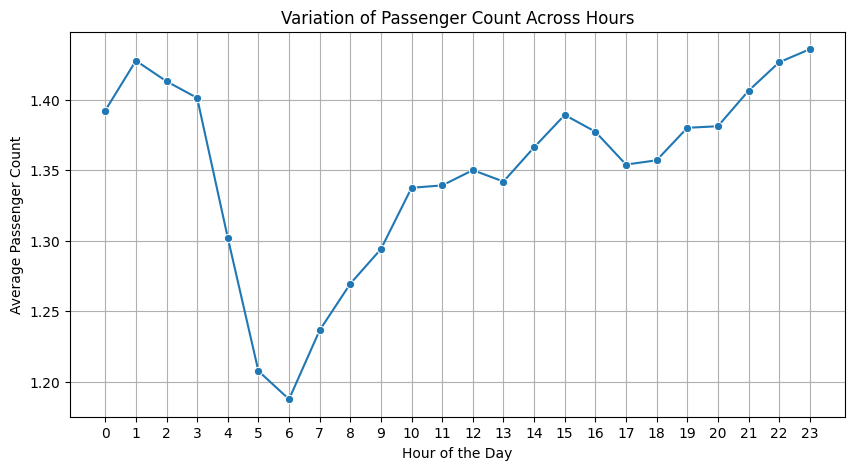

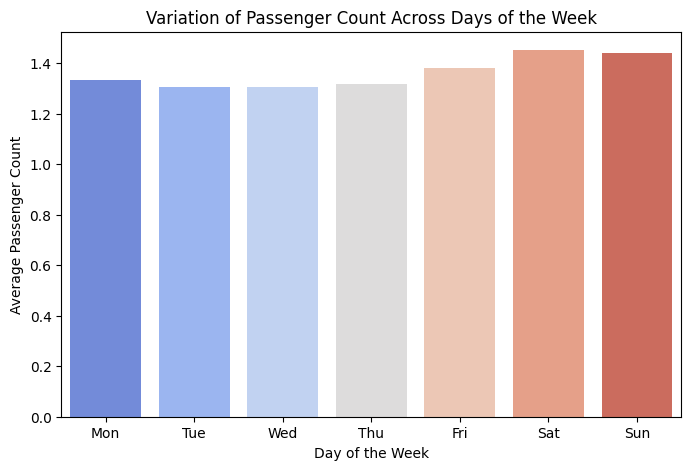

In [1396]:
# See how passenger count varies across hours and days
# Ensure pickup_datetime is in datetime format
dc["pickup_datetime"] = pd.to_datetime(dc["pickup_datetime"])

# Extract hour and day of the week
dc["hour"] = dc["pickup_datetime"].dt.hour
dc["day_of_week"] = dc["pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6

# Group by hour and calculate average passenger count
hourly_passengers = dc.groupby("hour")["passenger_count"].mean()

# Group by day of the week and calculate average passenger count
daily_passengers = dc.groupby("day_of_week")["passenger_count"].mean()

# Plot Passenger Count by Hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_passengers.index, y=hourly_passengers.values, marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count Across Hours")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Plot Passenger Count by Day of the Week
plt.figure(figsize=(8, 5))
sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y=daily_passengers.values, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count Across Days of the Week")
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

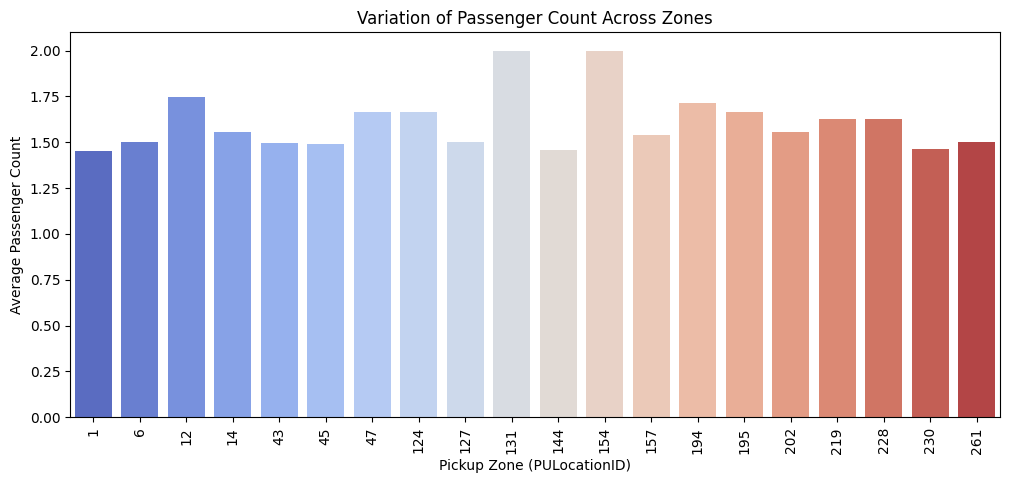

In [1398]:
# How does passenger count vary across zones
zone_passenger_counts = dc.groupby("PULocationID")["passenger_count"].mean().sort_values(ascending=False)

# Plot Passenger Count by Zone
plt.figure(figsize=(12, 5))
sns.barplot(x=zone_passenger_counts.index[:20],  # Top 20 zones
            y=zone_passenger_counts.values[:20], 
            palette="coolwarm")

plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count Across Zones")
plt.xticks(rotation=90)
plt.show()


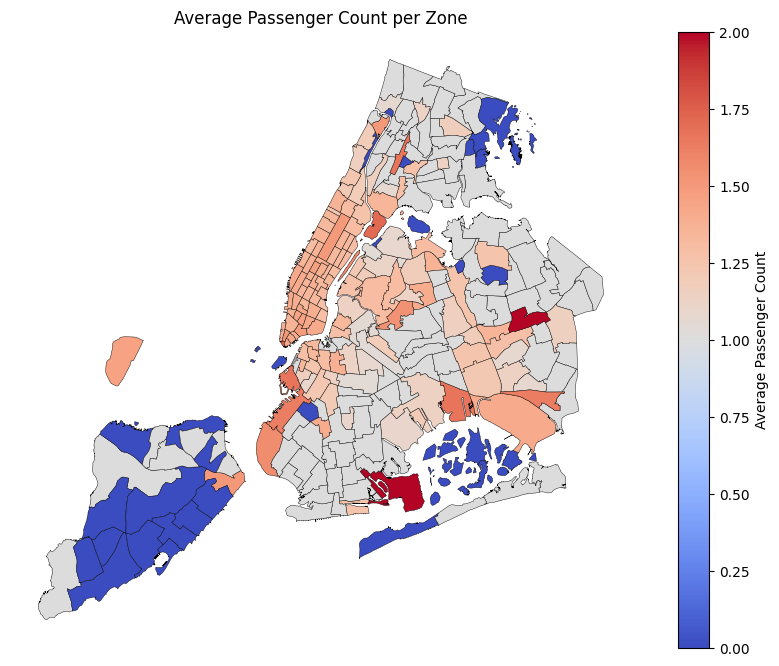

In [1404]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Compute average passenger count per pickup zone
avg_passenger_count = dc.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Merge with GeoDataFrame
zones_with_trips = zones.merge(avg_passenger_count, 
                                          left_on="LocationID", 
                                          right_on="PULocationID", 
                                          how="left")

# Fill missing values with 0 (for zones with no recorded trips)
zones_with_trips["passenger_count"].fillna(0, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the zones with average passenger count
zones_with_trips.plot(column="passenger_count", 
                      cmap="coolwarm", 
                      legend=True, 
                      legend_kwds={'label': "Average Passenger Count"},
                      edgecolor="black", 
                      linewidth=0.3, 
                      ax=ax)

plt.title("Average Passenger Count per Zone")
plt.axis("off")  # Remove axes for better visualization
plt.show()

In [1402]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        11.0  
1         0.0  
2         6.0  
3       318.0  
4         0.0

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

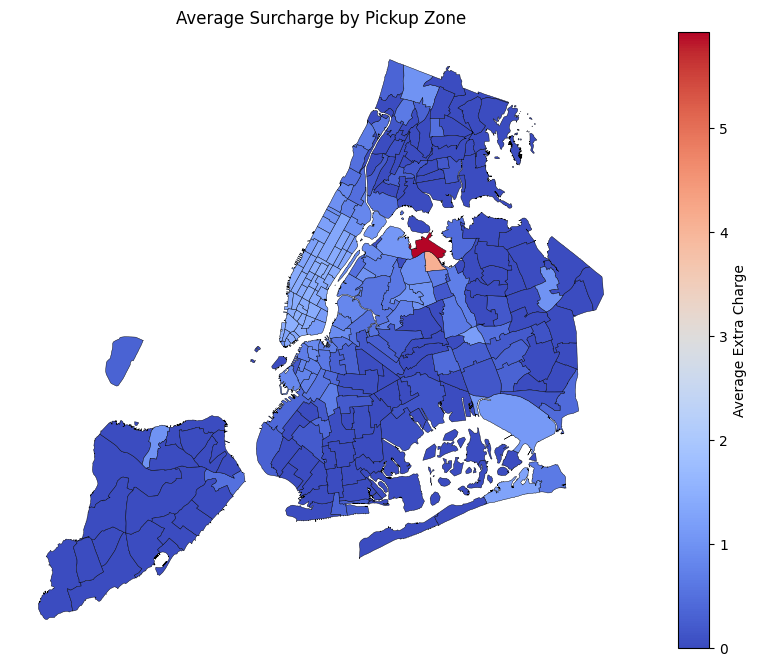

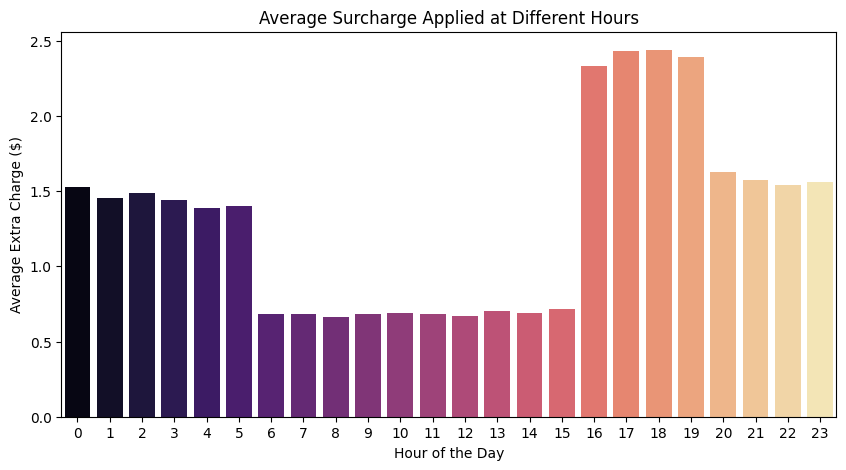

In [1407]:
# How often is each surcharge applied?
dc["extra"].value_counts()
# Group by pickup zones and calculate average surcharge
surcharge_by_zone = dc.groupby("PULocationID")["extra"].mean().reset_index()

# Merge with zones GeoDataFrame
zones_with_surcharges = zones_with_trips.merge(surcharge_by_zone, 
                                               left_on="LocationID", 
                                               right_on="PULocationID", 
                                               how="left")

# Fill missing values with 0
zones_with_surcharges["extra"].fillna(0, inplace=True)
# Plot surcharge distribution by zone
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_with_surcharges.plot(column="extra", cmap="coolwarm", legend=True, 
                           legend_kwds={'label': "Average Extra Charge"},
                           edgecolor="black", linewidth=0.3, ax=ax)
plt.title("Average Surcharge by Pickup Zone")
plt.axis("off")
plt.show()
# Extract hour from pickup time
dc["pickup_hour"] = dc["pickup_datetime"].dt.hour

# Compute average surcharge per hour
surcharge_by_hour = dc.groupby("pickup_hour")["extra"].mean()

# Plot surcharge trends across different hours
plt.figure(figsize=(10, 5))
sns.barplot(x=surcharge_by_hour.index, y=surcharge_by_hour.values, palette="magma")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charge ($)")
plt.title("Average Surcharge Applied at Different Hours")
plt.xticks(range(24))  # Show all 24 hours
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

•	Dynamic Fleet Allocation: Increase taxi availability in business districts during peak hours and in entertainment zones at night to reduce wait times.
•	Real-Time Traffic-Based Routing: Use GPS and historical traffic data to avoid congested routes, especially during rush hours.
•	Reduce Dead Miles: Implement a ride-pooling system to match drivers with nearby passengers to minimize unpaid travel.
•	Nighttime Efficiency: Deploy more cabs in high-surcharge zones (airports, bars, hotels) between 11 PM - 5 AM to meet demand.
•	Reduce Idle Time: Implement demand forecasting to ensure taxis are evenly spread across zones instead of clustering in a few high-demand areas.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

•	Weekday vs. Weekend Positioning:
•	Weekdays: More cabs in business hubs, train stations, and corporate areas (7 AM - 10 AM, 5 PM - 8 PM).
•	Weekends: Increased deployment in tourist spots, malls, and nightlife areas (6 PM - 2 AM).
•	Zone-Based Strategy:
•	High Pickup Zones: Increase supply in airports, metro stations, shopping districts, and event venues.
•	High Drop-off Zones: Ensure enough cabs in residential areas at peak drop-off hours to prevent shortages.
•	Distance-Based Allocation:
•	Shorter trips (≤2 miles) should have more availability near residential areas and local transit hubs.
•	Longer trips (5+ miles) should have dedicated routes from airports and major city exits.
•	Time-Based Deployment:
•	Peak Hours: Assign more taxis to high-demand routes to prevent fare surges.
•	Late-Night: Position cabs near bars and 24/7 transport hubs for better availability.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

•	Distance-Based Fare Adjustments:
•	Short trips (≤2 miles) tend to have higher fare per mile due to base fares. Offering discounts on very short rides may increase ride frequency.
•	Longer trips (5+ miles) should have competitive per-mile rates to encourage usage.
•	Time-Based Pricing Adjustments:
•	Implement higher fares for peak demand hours (7 AM - 10 AM, 5 PM - 8 PM).
•	Offer off-peak discounts (11 AM - 4 PM) to increase demand.
•	Nighttime Pricing Strategy:
•	Nighttime fares are naturally higher due to surcharges. Offering loyalty discounts or flat-rate rides can improve user retention.
•	Encourage shared rides to make nighttime travel more affordable.
•	Vendor-Based Competitive Pricing:
•	Vendors with higher fare-per-mile rates should consider promotional offers to remain competitive.
•	Introduce subscription plans for frequent riders to drive customer loyalty.